In [ ]:
# Uncertainty in Physics-Informed Inverse Problems
# Anonymous, Anonymous 2025
# This code was originally developed
# from the code produced by the following project.
# Hamiltonian Neural Networks | 2019
# Sam Greydanus, Misko Dzamba, Jason Yosinski

In [2]:
import torch, time, sys
import autograd
import autograd.numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import scipy.integrate
solve_ivp = scipy.integrate.solve_ivp

sys.path.append('../TrainNN')
sys.path.append('../TrainNN/train')
from data import get_dataset, get_field, get_trajectory, dynamics_fn, hamiltonian_fn
from nn_models import MLP
from hnn import HNN
from utils import L2_loss
from sklearn.metrics.pairwise import cosine_similarity 

In [8]:
DPI = 300
FORMAT = 'pdf'
LINE_SEGMENTS = 10
ARROW_SCALE = 30
ARROW_WIDTH = 6e-3
LINE_WIDTH = 2
RK4 = ''

def get_args():
    return {'input_dim': 2,
            'hidden_dim': 200,
            'learn_rate': 1e-3,
            'nonlinearity': 'tanh',
            'total_steps': 2000,
            'field_type': 'solenoidal',
            'print_every': 200,
            'name': 'spring',
            'gridsize': 10,
            'input_noise': 0.5,
            'baseline': 'baseline',
            'seed': 0,
            'fig_dir': './figures'}

class ObjectView(object):
    def __init__(self, d): self.__dict__ = d

In [19]:
def get_model(args, baseline):
    output_dim = args.input_dim if baseline else 2
    nn_model = MLP(args.input_dim, args.hidden_dim, output_dim, args.nonlinearity)
    model = HNN(args.input_dim, differentiable_model=nn_model,
              field_type=args.field_type, baseline=baseline)
    
    model_name = 'baseline' if baseline else 'hnn'
    path = "../TrainNN/results/training-results_"+str(time_index)+".tar"
    model.load_state_dict(torch.load(path))
    print(time_index)
    return model

In [20]:
plot_data = np.load("../TrainNN/traindata/TrainHNN_GZ_26_origin_1.npy")
print(plot_data.shape)
plot_data = plot_data[:,150:250,100:200]
#plot_data = plot_data.reshape([401,100*100,7])

x_time = np.loadtxt("../MakeData/run_GZ_26/x-time_mod.dat", delimiter="  ")
x_time = x_time.reshape([400,301,10])
x_time = x_time[:,100:200]
x_time = x_time.reshape([400*100,10])
H = np.zeros([401,100,100])
for count_time in range(100,200):
    #print(count_time)
    V_y = x_time[np.where((x_time[:,0]>(count_time-1)*10-1) & (x_time[:,0]<(count_time-1)*10+1))[0]][:,4]
    V_y += 0.02
    V_y = V_y[::1]
    k_x = plot_data[count_time-1,:,0,2]
    x = plot_data[count_time-1,:,0,1]
    #if count_time == 100:
    #    H = np.zeros([401,k_x.shape[0],V_y.shape[0]])
    for count_x in range(0,V_y.shape[0]):
        for count_k in range(0,k_x.shape[0]):
            #print(1/(2+k_x[count_k]**2))
            H[count_time,count_k,count_x] = 1/(2+k_x[count_k]**2)+V_y[count_x] + 0.02*x[count_x]
H.shape
print(k_x.shape[0],V_y.shape[0])

(401, 401, 301, 7)
100 100


# Plot results

150


/var/folders/ts/qjqfp9s96ls7tl_x15xhlf0r0000gn/T/ipykernel_17116/1459985591.py:43: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(X,Y,H[time-1], colors="red",label="True")


<Figure size 2000x800 with 0 Axes>

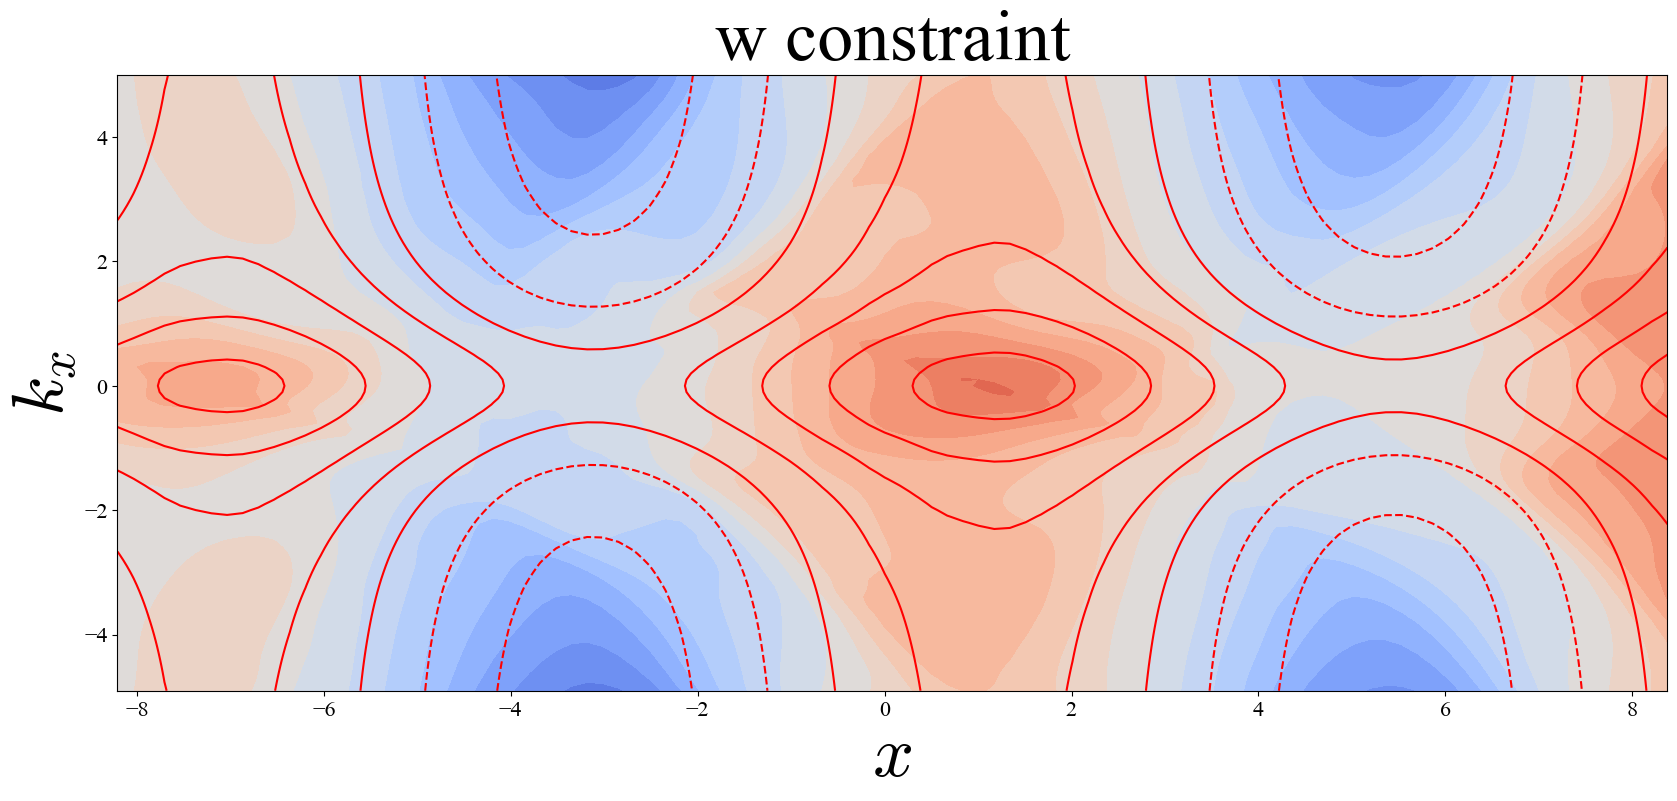

(10000,) (10000,)
cos sim = [[0.56307009]]
151


/var/folders/ts/qjqfp9s96ls7tl_x15xhlf0r0000gn/T/ipykernel_17116/1459985591.py:43: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(X,Y,H[time-1], colors="red",label="True")


<Figure size 2000x800 with 0 Axes>

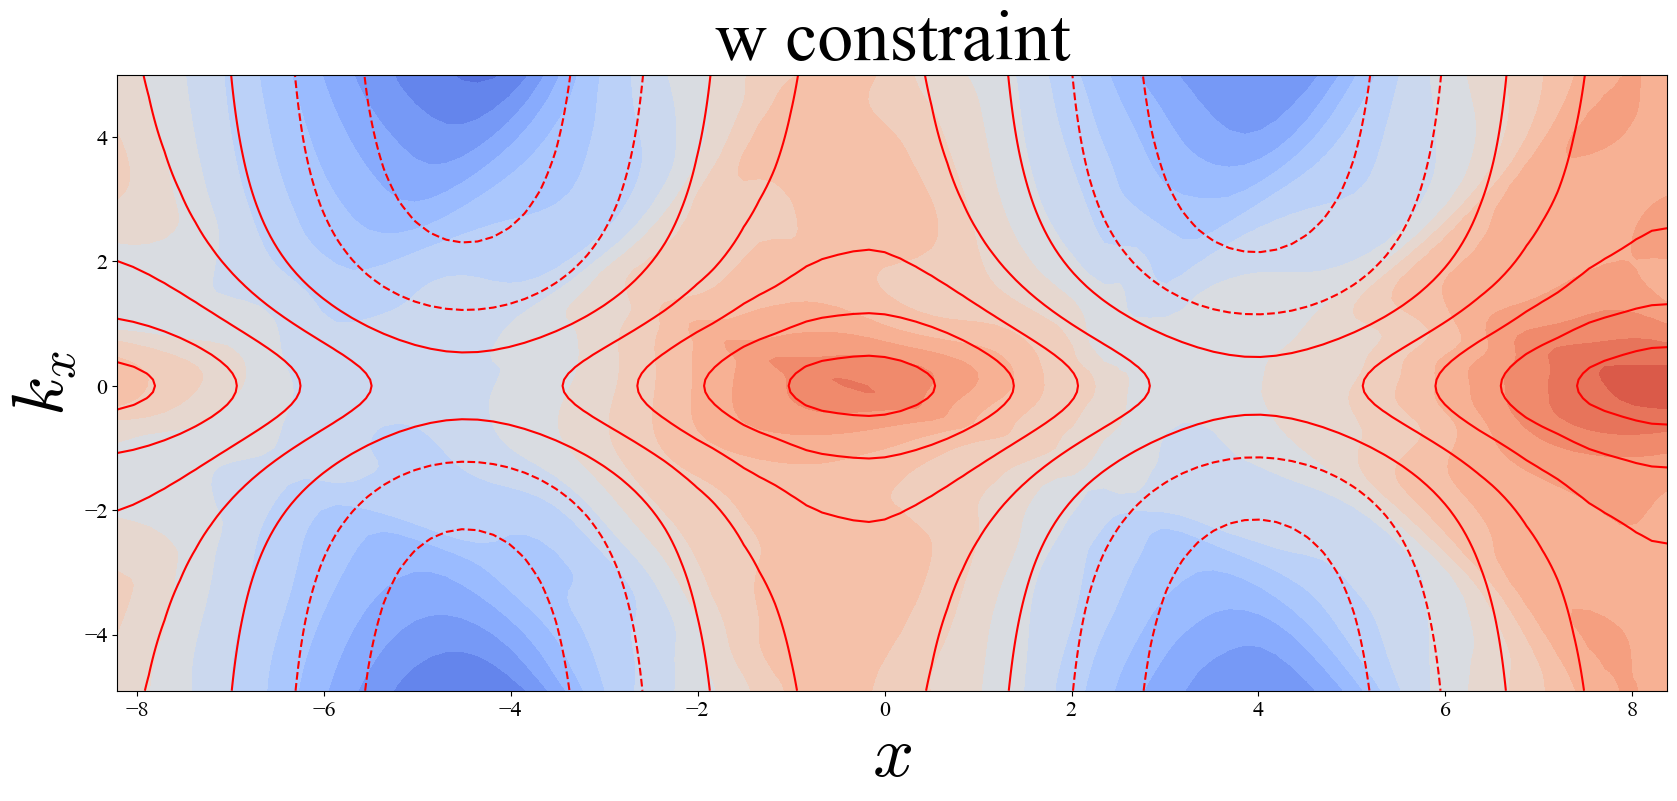

(10000,) (10000,)
cos sim = [[0.37929608]]
152


/var/folders/ts/qjqfp9s96ls7tl_x15xhlf0r0000gn/T/ipykernel_17116/1459985591.py:43: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(X,Y,H[time-1], colors="red",label="True")


<Figure size 2000x800 with 0 Axes>

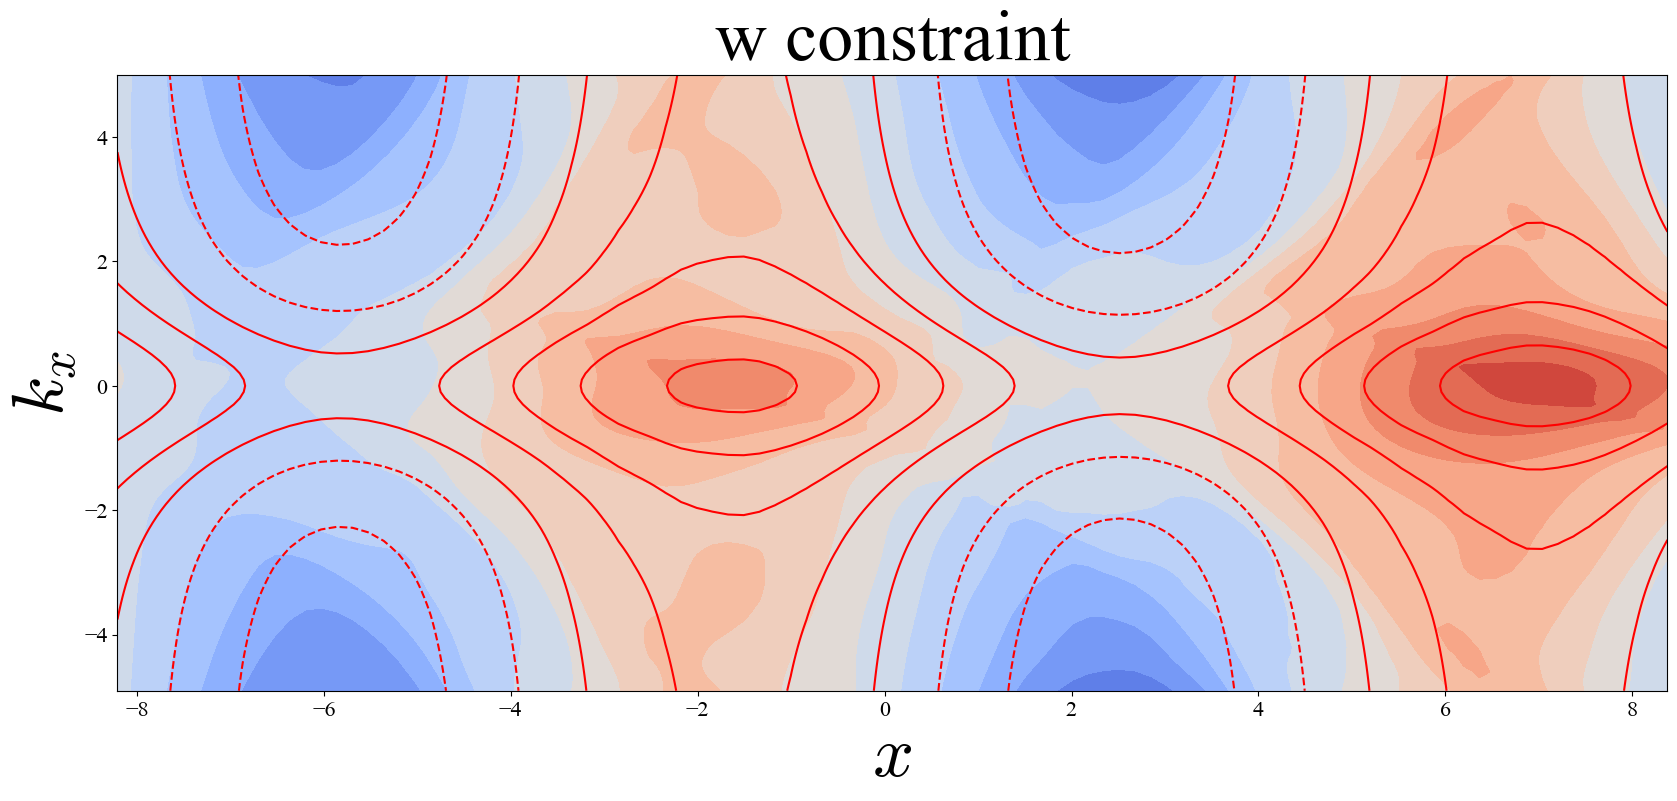

(10000,) (10000,)
cos sim = [[0.20295366]]
153


/var/folders/ts/qjqfp9s96ls7tl_x15xhlf0r0000gn/T/ipykernel_17116/1459985591.py:43: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(X,Y,H[time-1], colors="red",label="True")


<Figure size 2000x800 with 0 Axes>

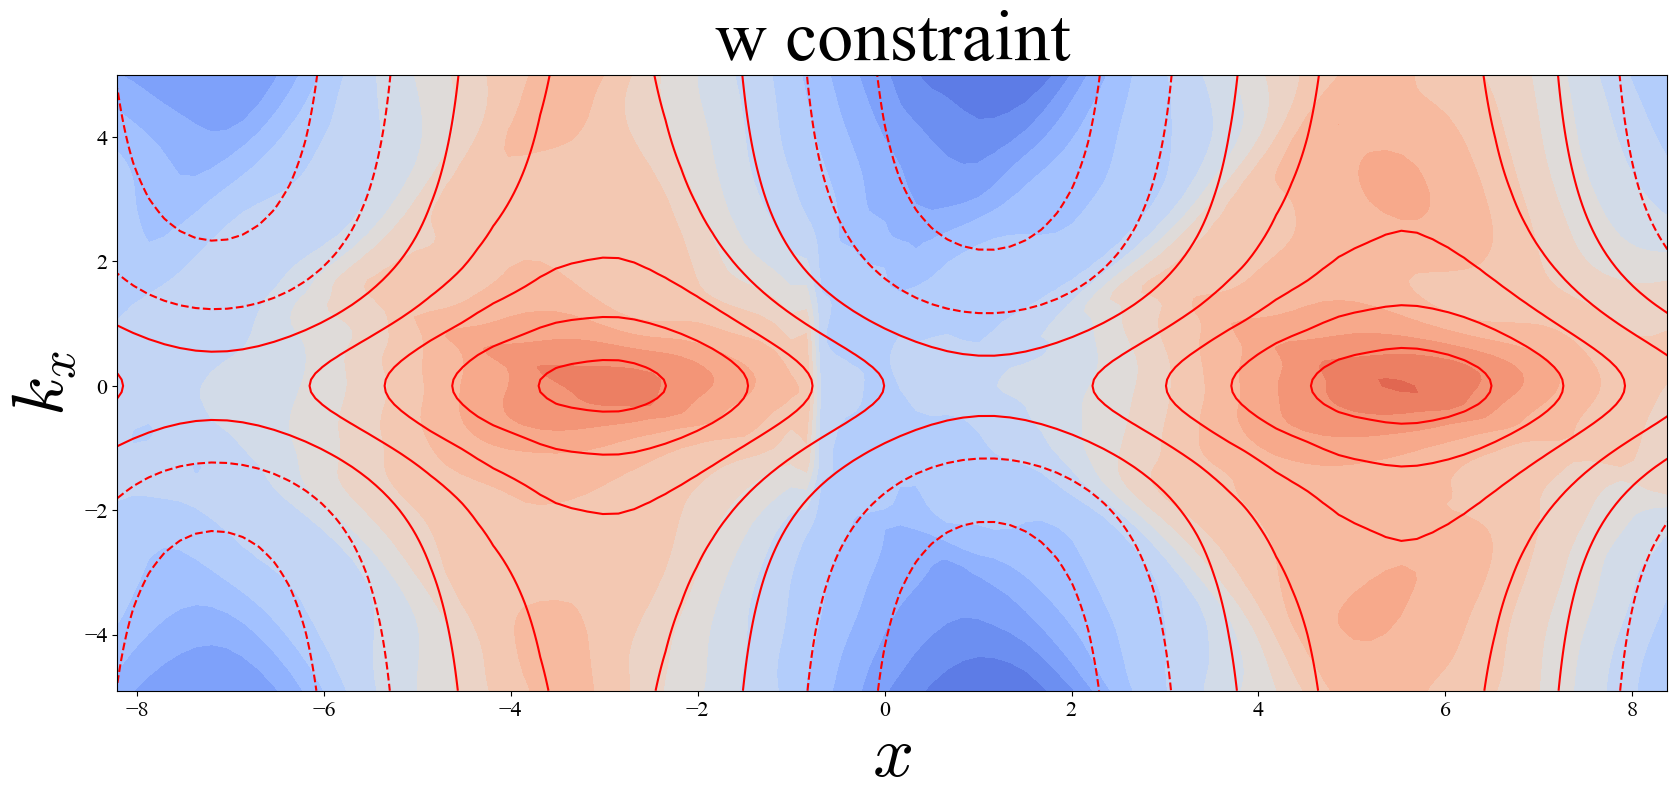

(10000,) (10000,)
cos sim = [[0.44143783]]
154


/var/folders/ts/qjqfp9s96ls7tl_x15xhlf0r0000gn/T/ipykernel_17116/1459985591.py:43: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(X,Y,H[time-1], colors="red",label="True")


<Figure size 2000x800 with 0 Axes>

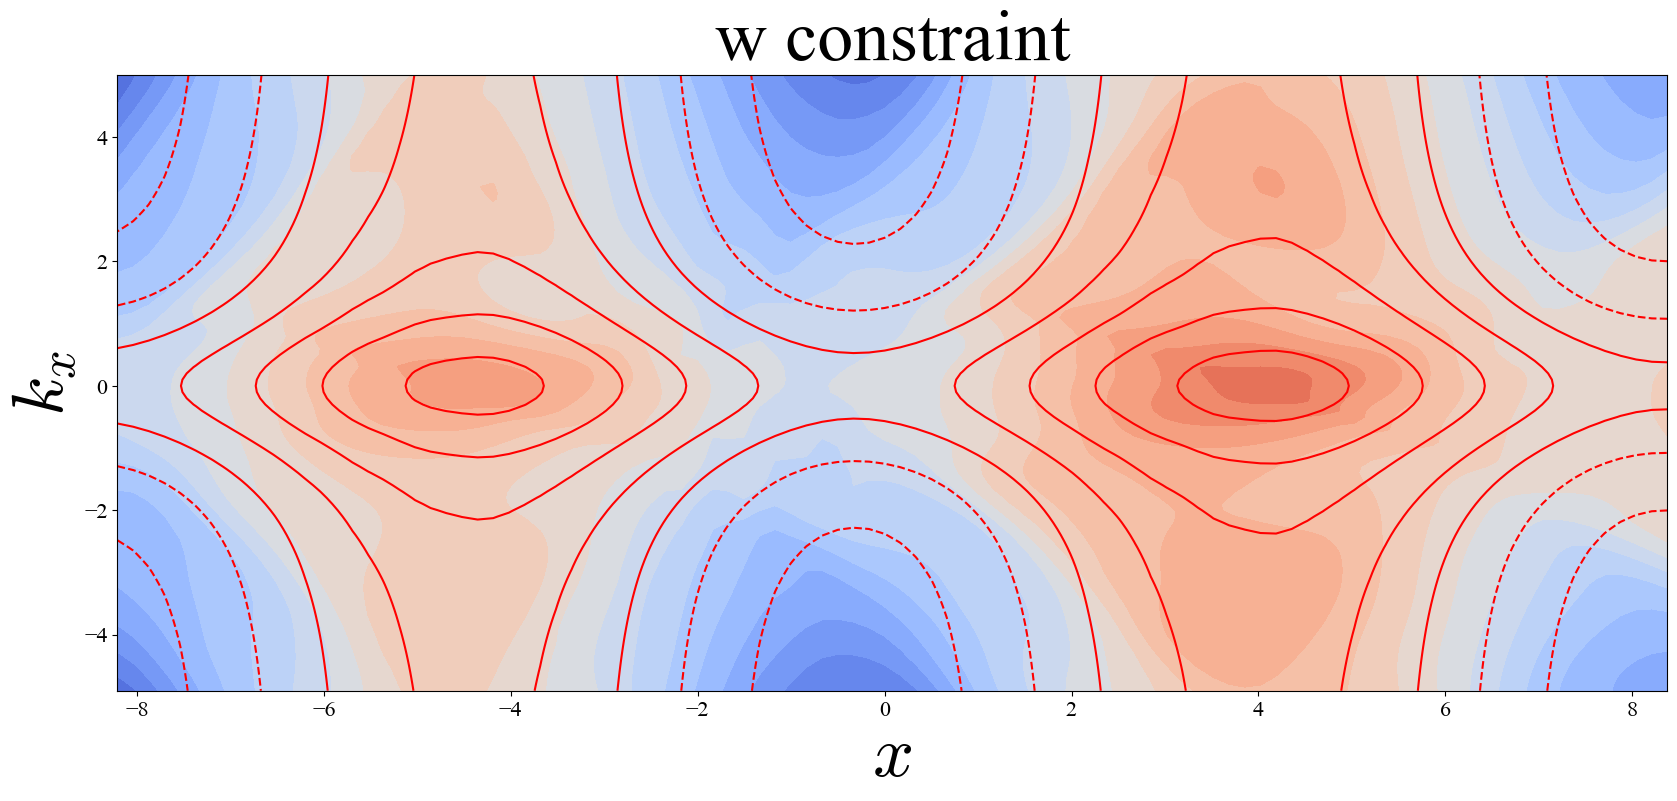

(10000,) (10000,)
cos sim = [[-0.04354759]]
155


/var/folders/ts/qjqfp9s96ls7tl_x15xhlf0r0000gn/T/ipykernel_17116/1459985591.py:43: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(X,Y,H[time-1], colors="red",label="True")


<Figure size 2000x800 with 0 Axes>

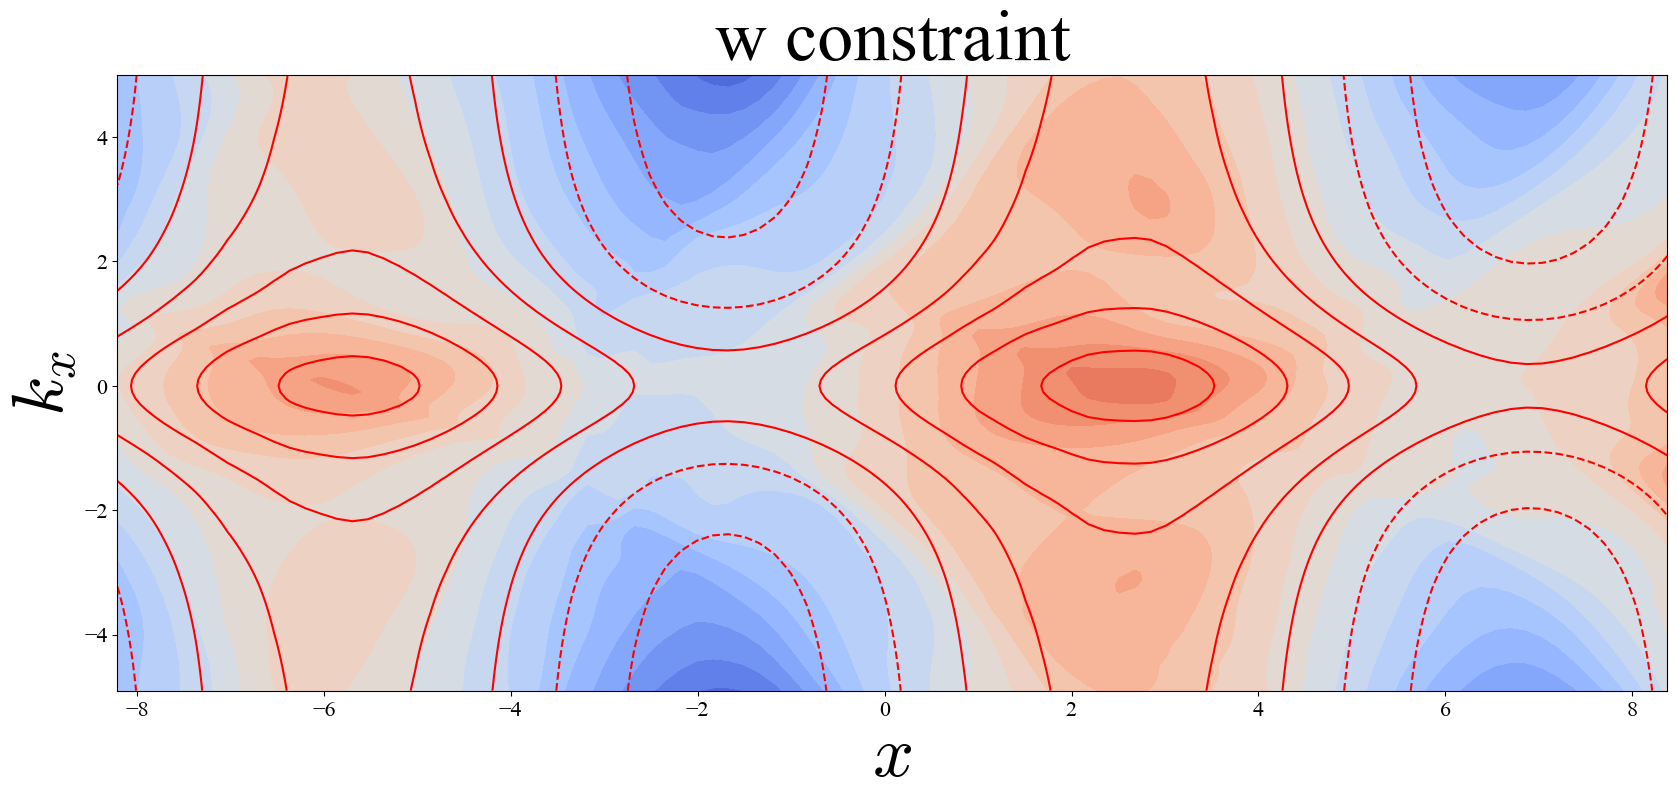

(10000,) (10000,)
cos sim = [[0.43060567]]
156


/var/folders/ts/qjqfp9s96ls7tl_x15xhlf0r0000gn/T/ipykernel_17116/1459985591.py:43: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(X,Y,H[time-1], colors="red",label="True")


<Figure size 2000x800 with 0 Axes>

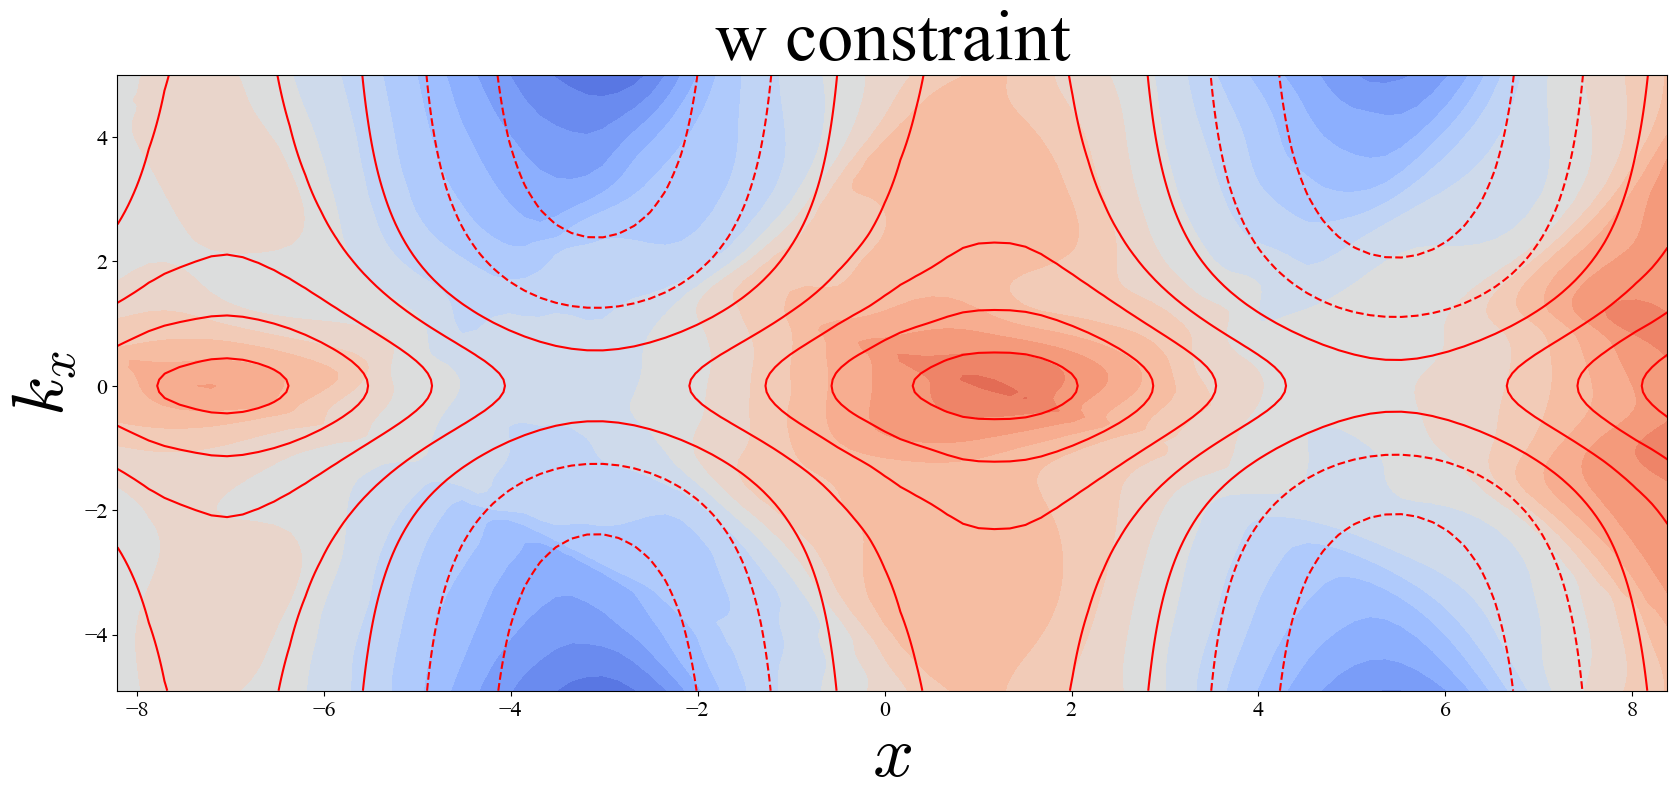

(10000,) (10000,)
cos sim = [[0.48739993]]
157


/var/folders/ts/qjqfp9s96ls7tl_x15xhlf0r0000gn/T/ipykernel_17116/1459985591.py:43: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(X,Y,H[time-1], colors="red",label="True")


<Figure size 2000x800 with 0 Axes>

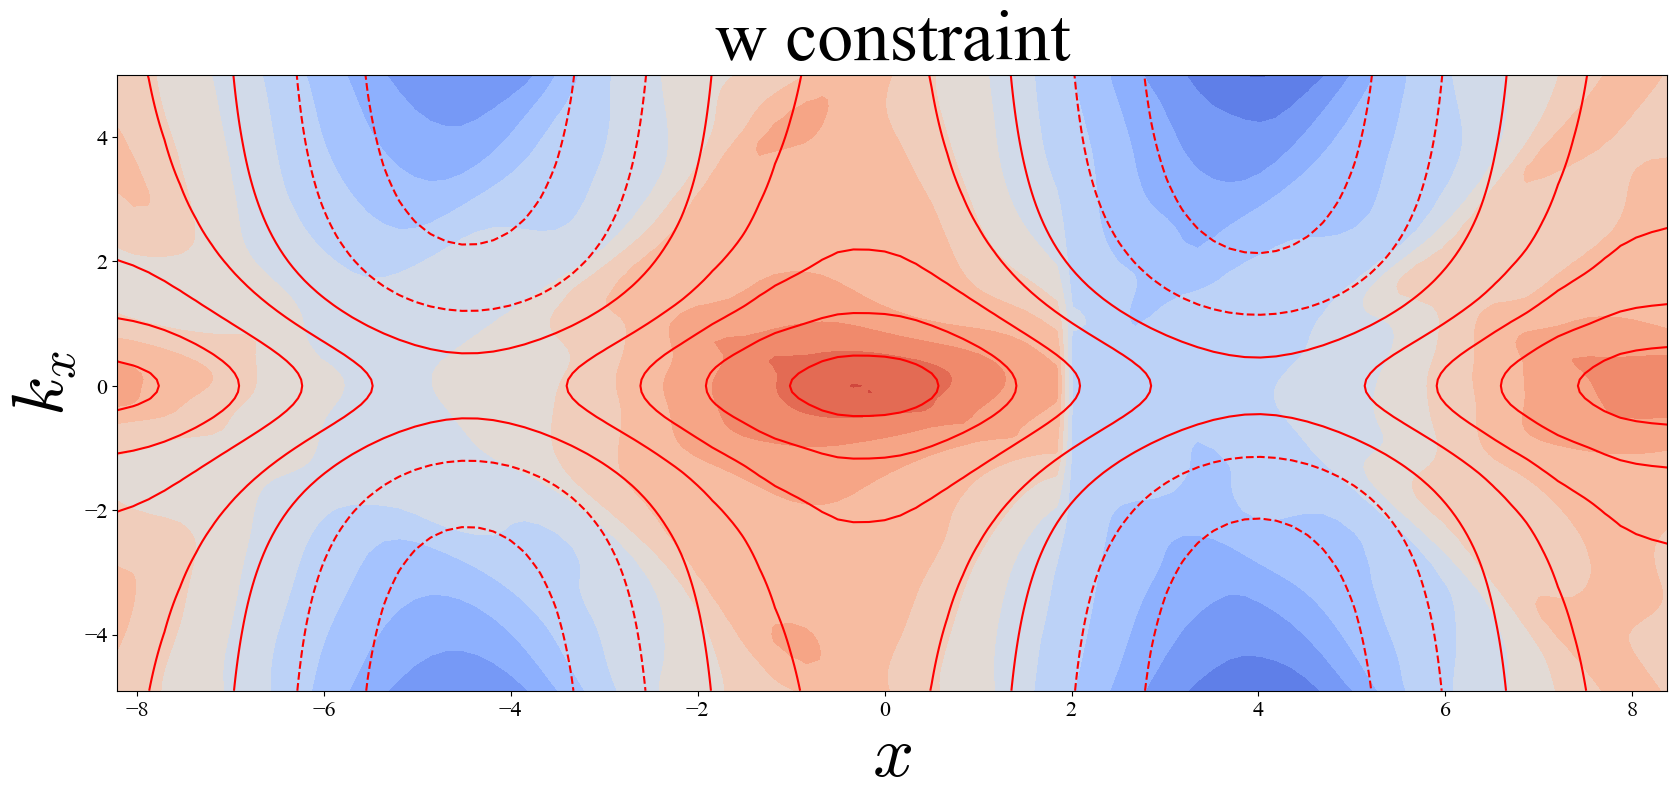

(10000,) (10000,)
cos sim = [[0.25685523]]
158


/var/folders/ts/qjqfp9s96ls7tl_x15xhlf0r0000gn/T/ipykernel_17116/1459985591.py:43: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(X,Y,H[time-1], colors="red",label="True")


<Figure size 2000x800 with 0 Axes>

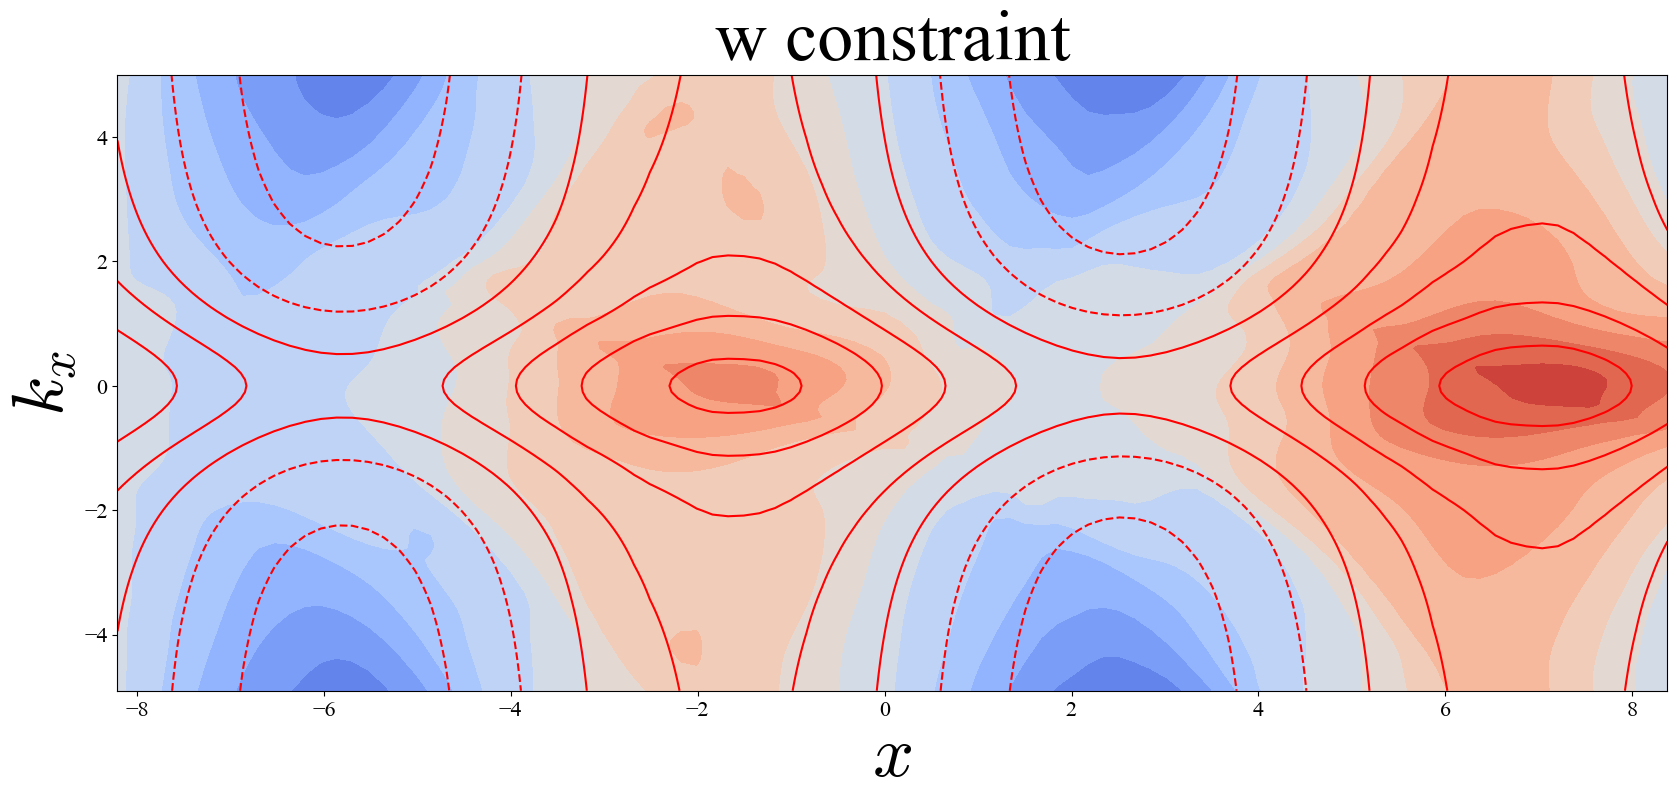

(10000,) (10000,)
cos sim = [[0.26193231]]
159


/var/folders/ts/qjqfp9s96ls7tl_x15xhlf0r0000gn/T/ipykernel_17116/1459985591.py:43: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(X,Y,H[time-1], colors="red",label="True")


<Figure size 2000x800 with 0 Axes>

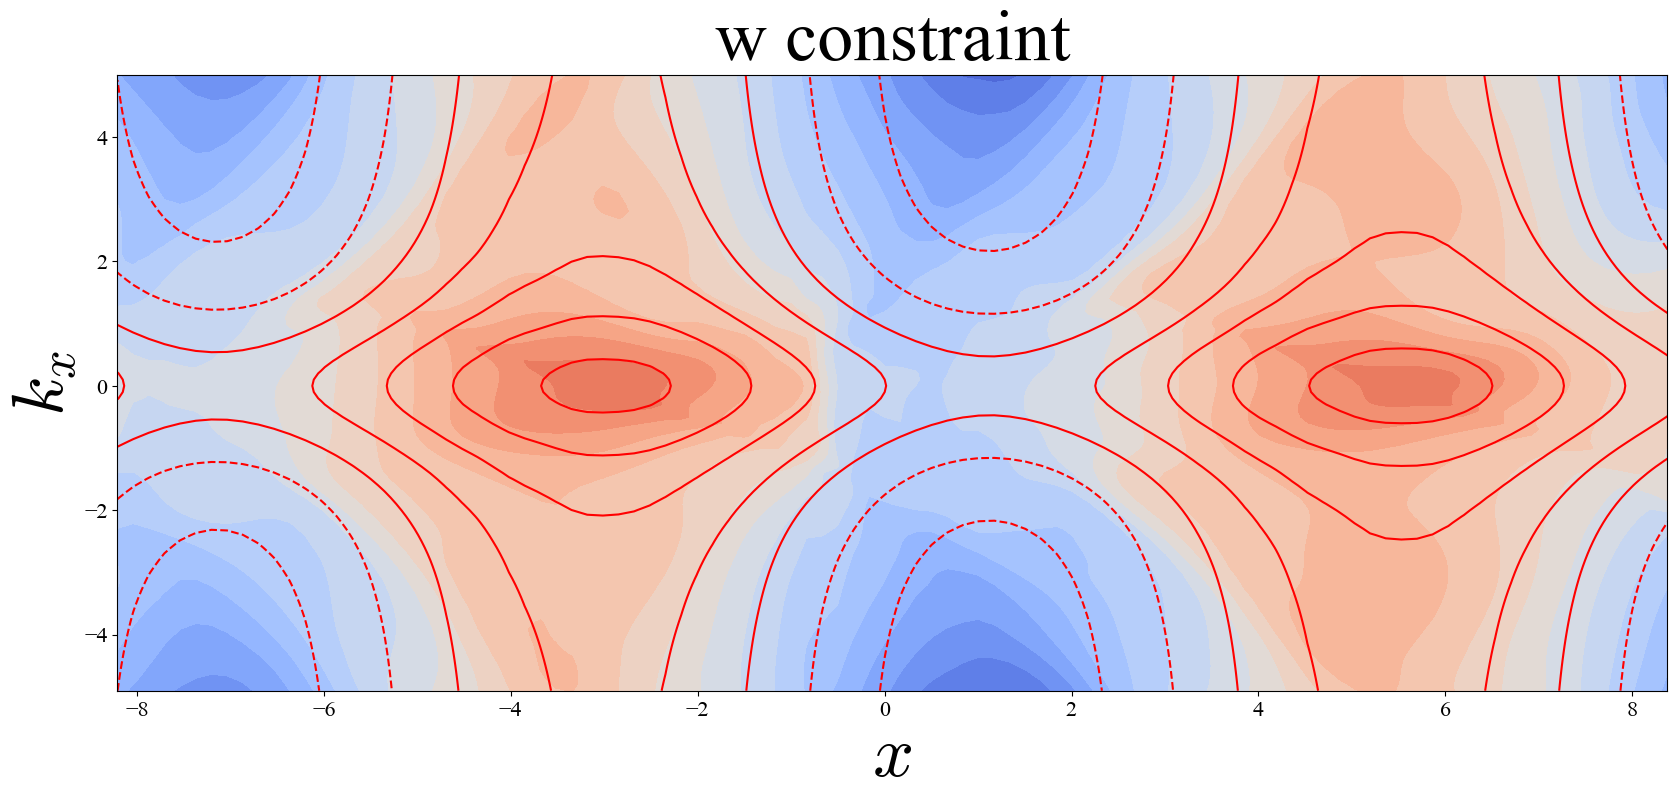

(10000,) (10000,)
cos sim = [[0.93016138]]
160


/var/folders/ts/qjqfp9s96ls7tl_x15xhlf0r0000gn/T/ipykernel_17116/1459985591.py:43: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(X,Y,H[time-1], colors="red",label="True")


<Figure size 2000x800 with 0 Axes>

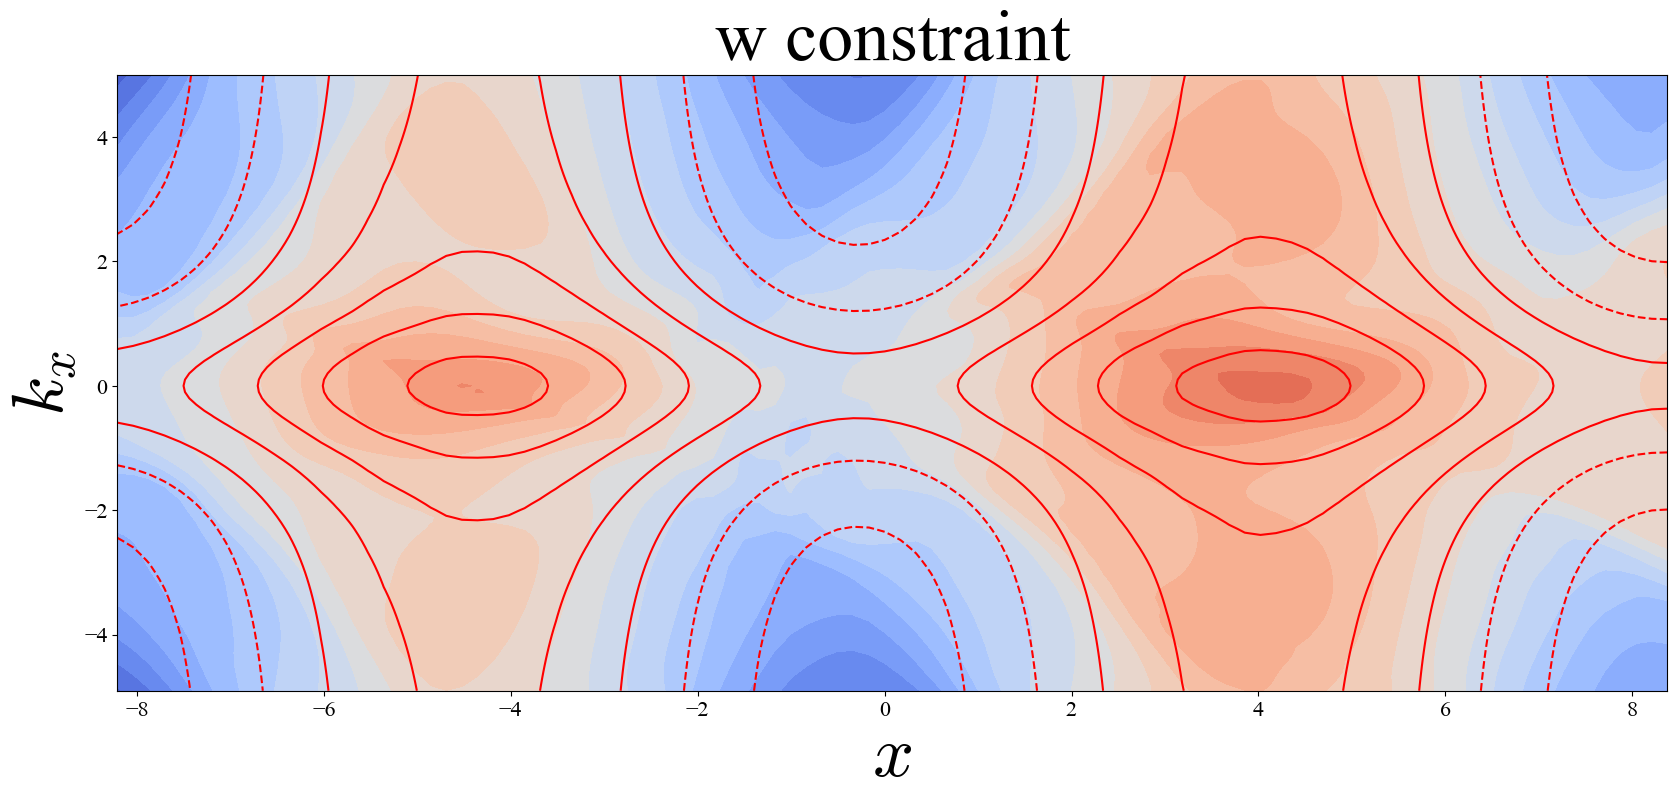

(10000,) (10000,)
cos sim = [[0.46238426]]
161


/var/folders/ts/qjqfp9s96ls7tl_x15xhlf0r0000gn/T/ipykernel_17116/1459985591.py:43: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(X,Y,H[time-1], colors="red",label="True")


<Figure size 2000x800 with 0 Axes>

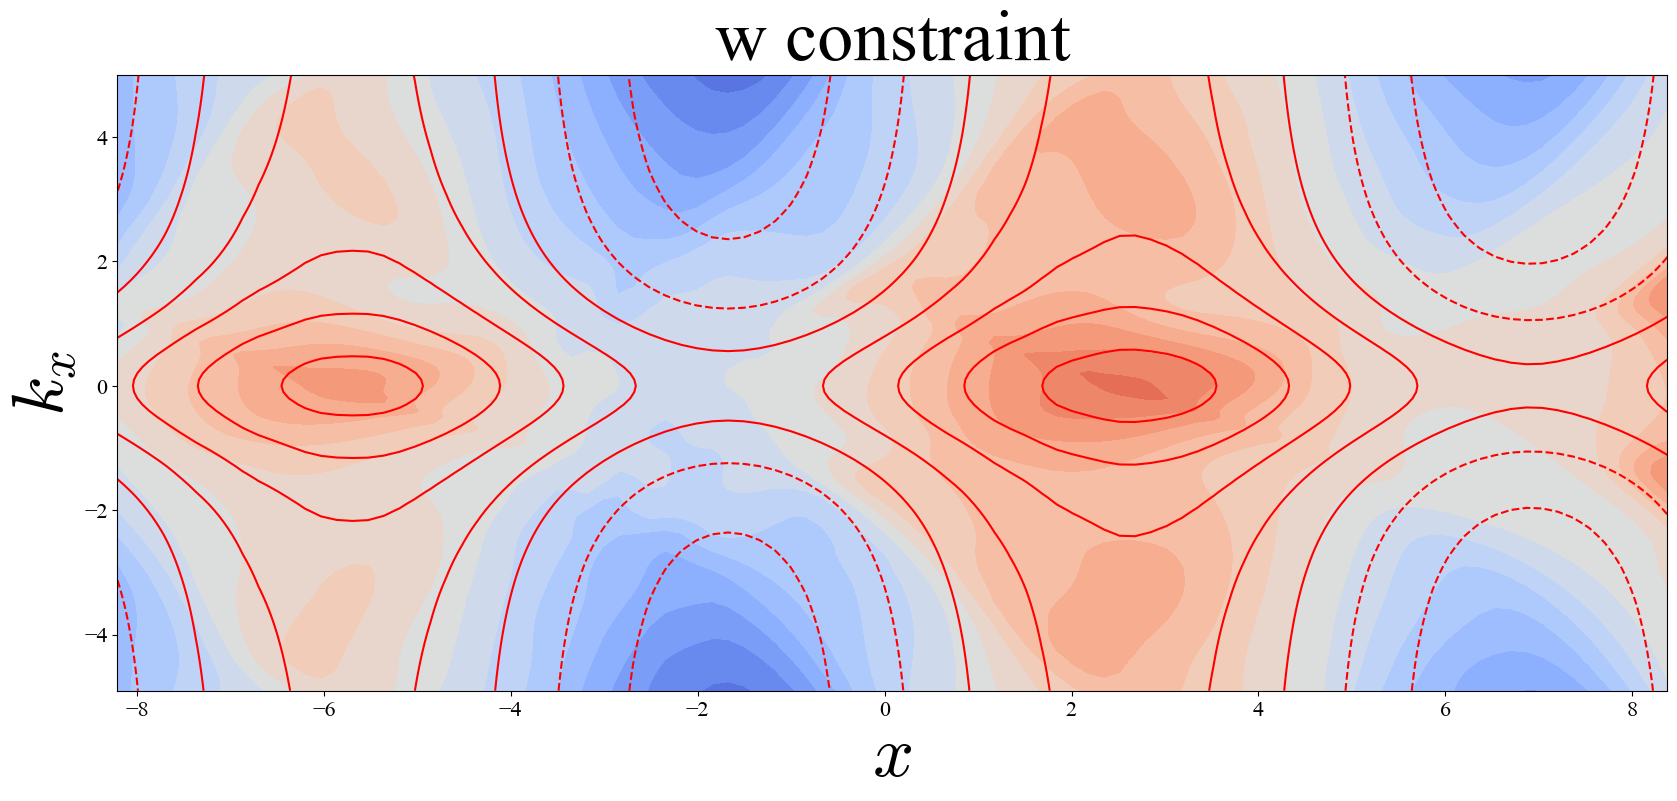

(10000,) (10000,)
cos sim = [[0.29238568]]
162


/var/folders/ts/qjqfp9s96ls7tl_x15xhlf0r0000gn/T/ipykernel_17116/1459985591.py:43: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(X,Y,H[time-1], colors="red",label="True")


<Figure size 2000x800 with 0 Axes>

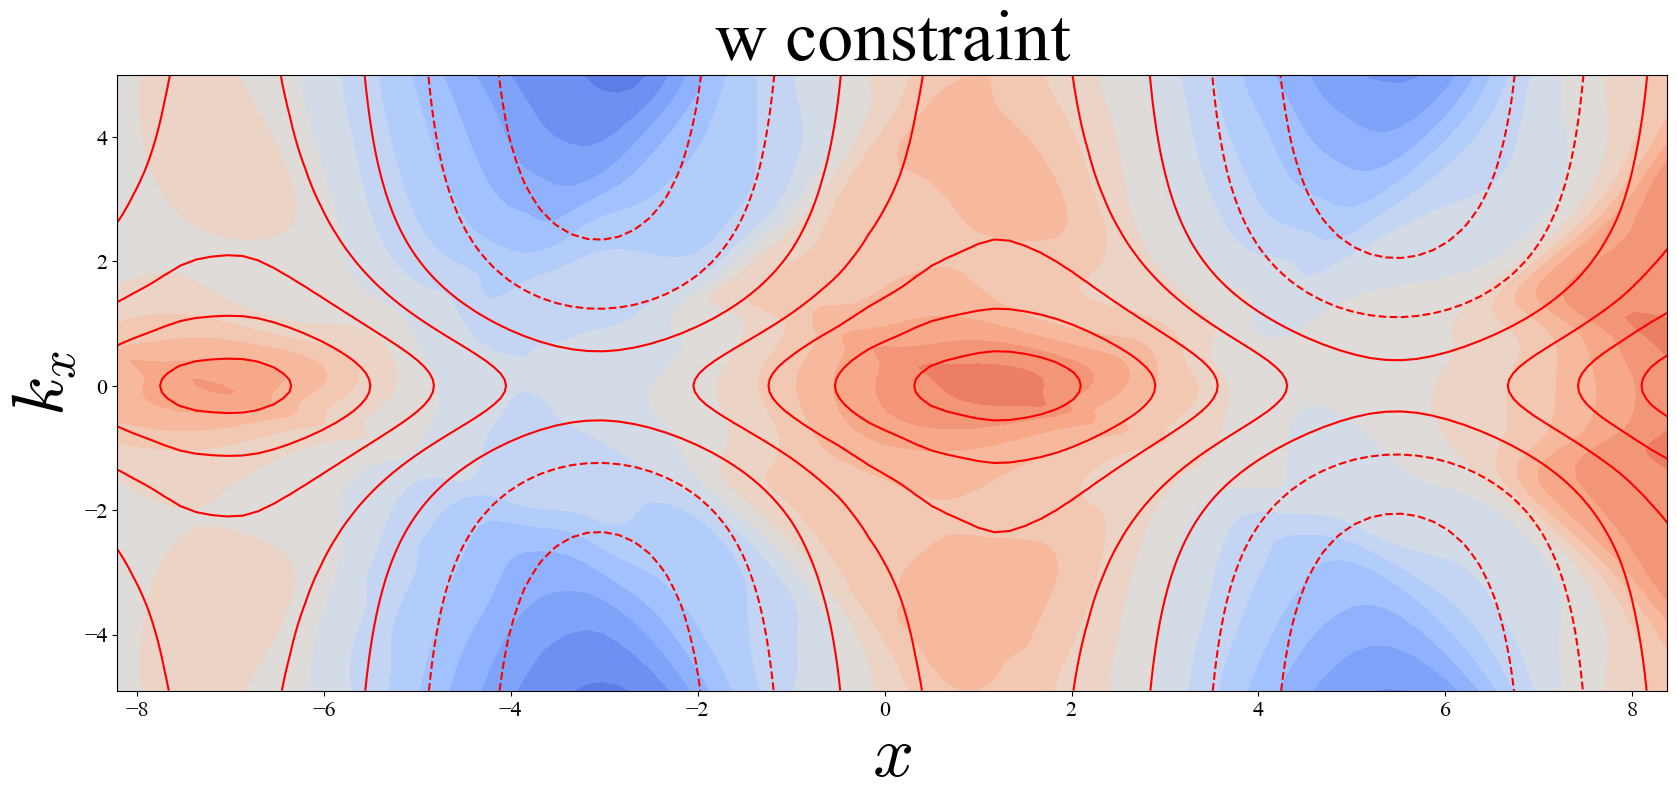

(10000,) (10000,)
cos sim = [[0.03733778]]
163


/var/folders/ts/qjqfp9s96ls7tl_x15xhlf0r0000gn/T/ipykernel_17116/1459985591.py:43: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(X,Y,H[time-1], colors="red",label="True")


<Figure size 2000x800 with 0 Axes>

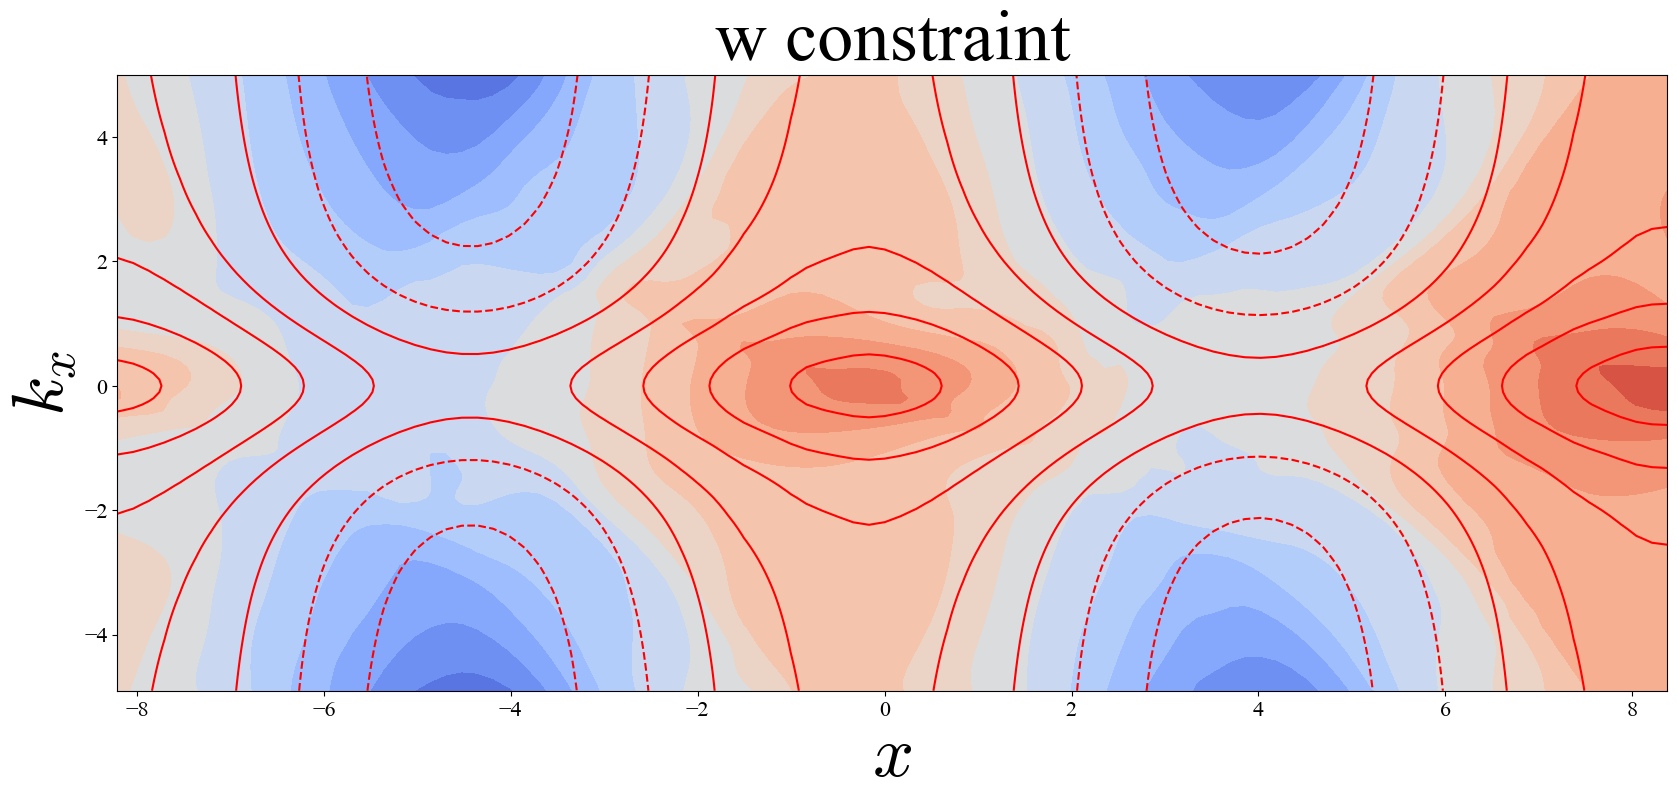

(10000,) (10000,)
cos sim = [[0.22337086]]
164


/var/folders/ts/qjqfp9s96ls7tl_x15xhlf0r0000gn/T/ipykernel_17116/1459985591.py:43: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(X,Y,H[time-1], colors="red",label="True")


<Figure size 2000x800 with 0 Axes>

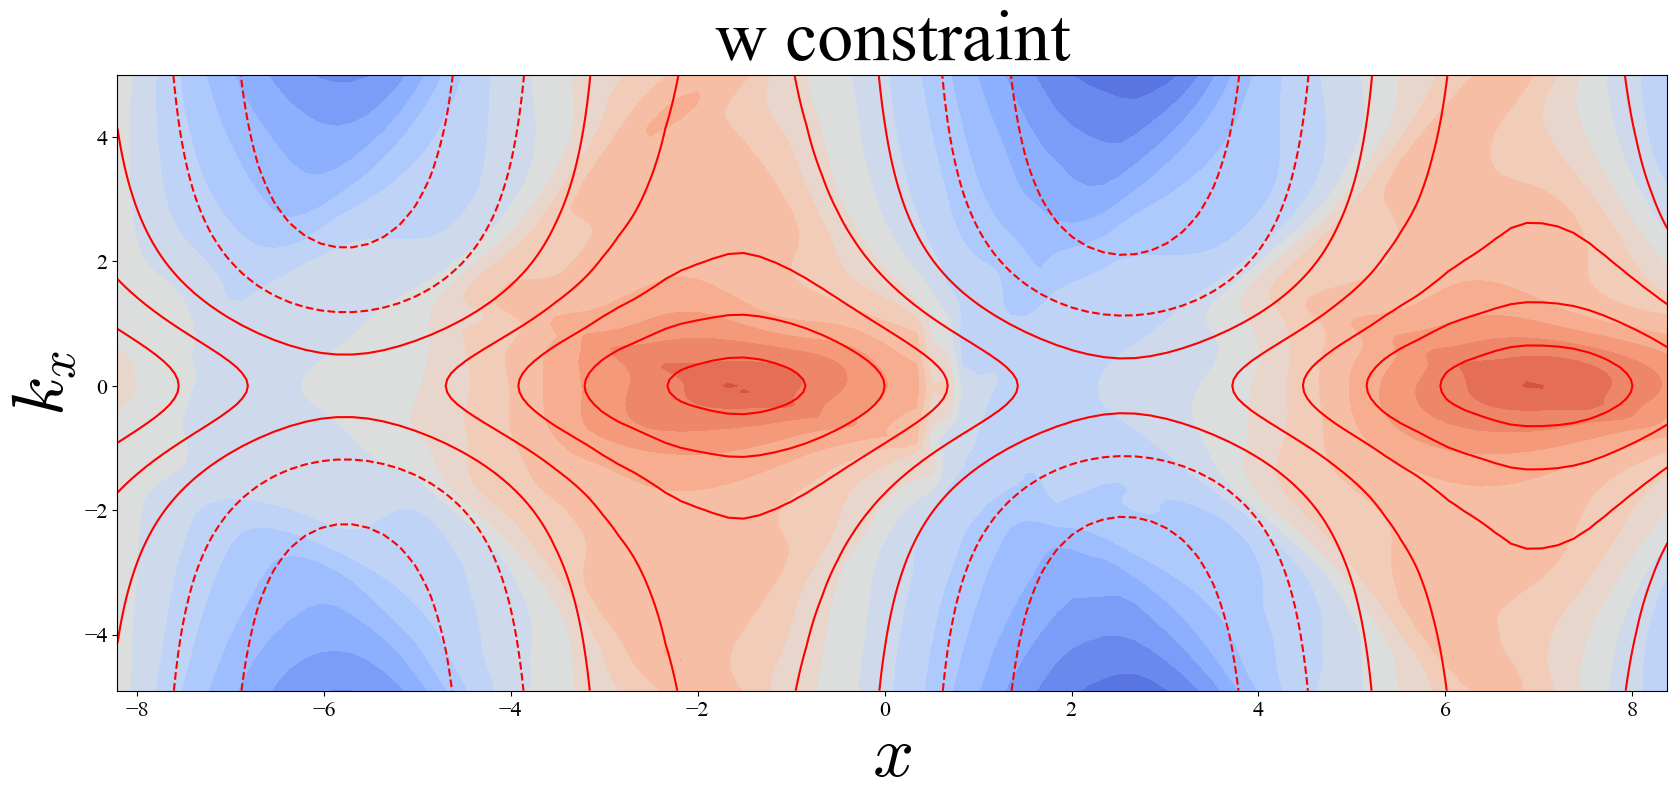

(10000,) (10000,)
cos sim = [[0.26203299]]
165


/var/folders/ts/qjqfp9s96ls7tl_x15xhlf0r0000gn/T/ipykernel_17116/1459985591.py:43: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(X,Y,H[time-1], colors="red",label="True")


<Figure size 2000x800 with 0 Axes>

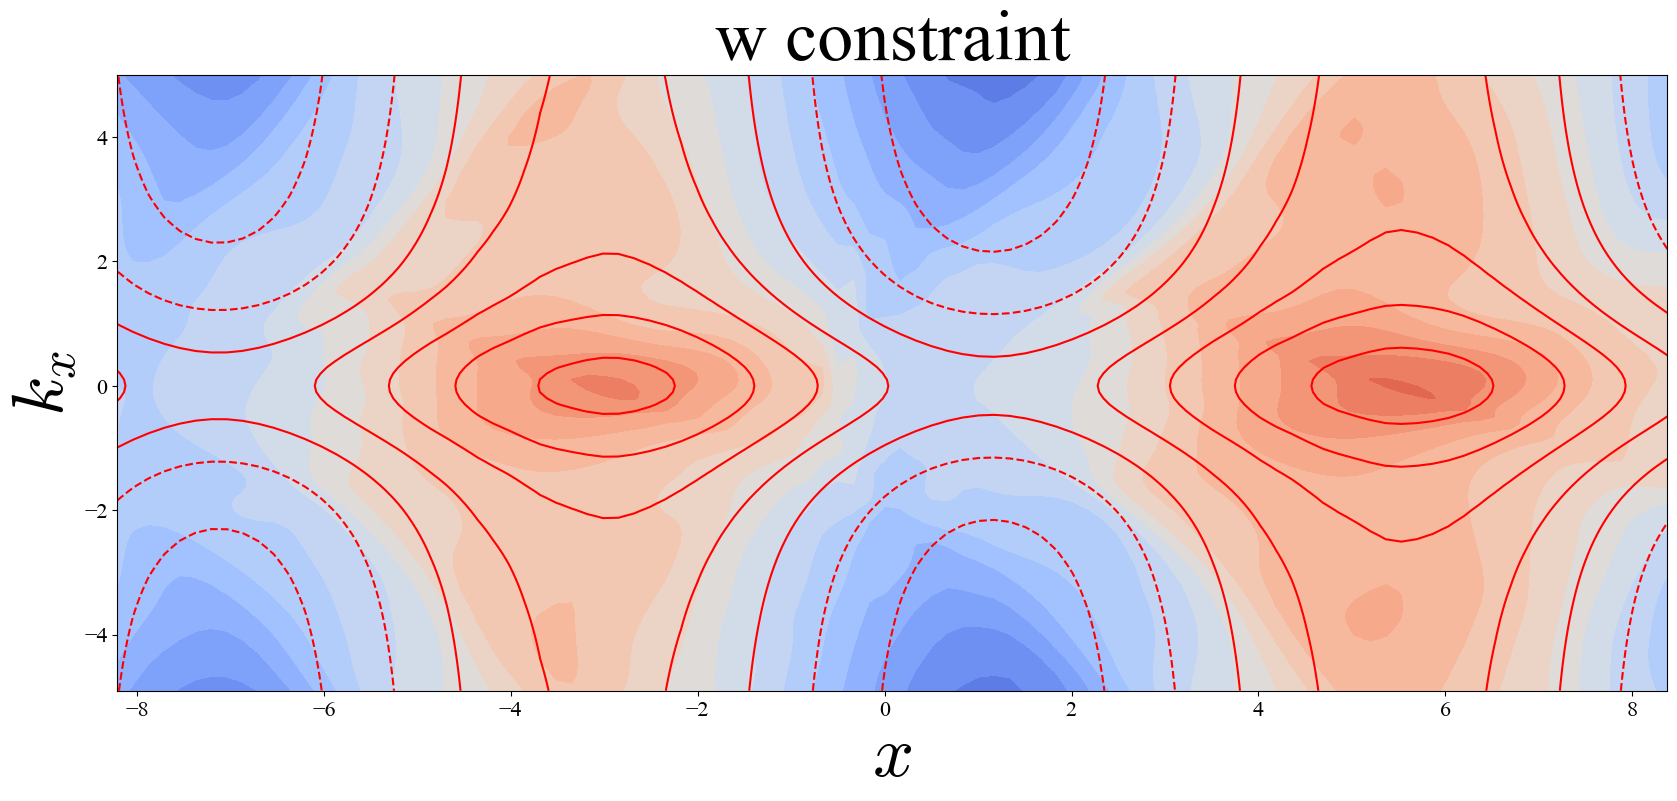

(10000,) (10000,)
cos sim = [[0.93200848]]
166


/var/folders/ts/qjqfp9s96ls7tl_x15xhlf0r0000gn/T/ipykernel_17116/1459985591.py:43: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(X,Y,H[time-1], colors="red",label="True")


<Figure size 2000x800 with 0 Axes>

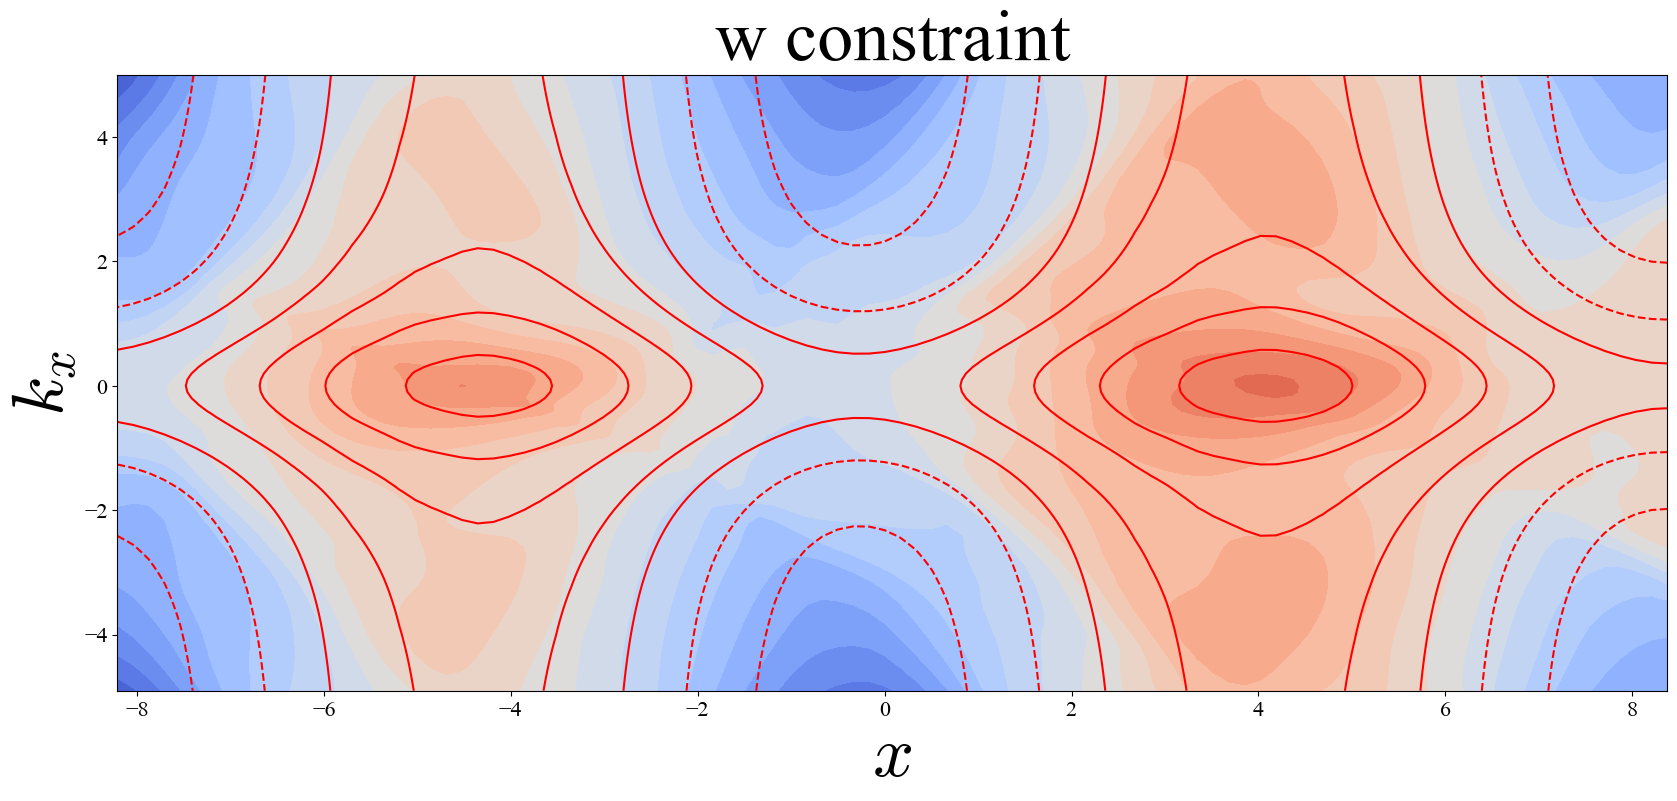

(10000,) (10000,)
cos sim = [[0.25533915]]
167


/var/folders/ts/qjqfp9s96ls7tl_x15xhlf0r0000gn/T/ipykernel_17116/1459985591.py:43: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(X,Y,H[time-1], colors="red",label="True")


<Figure size 2000x800 with 0 Axes>

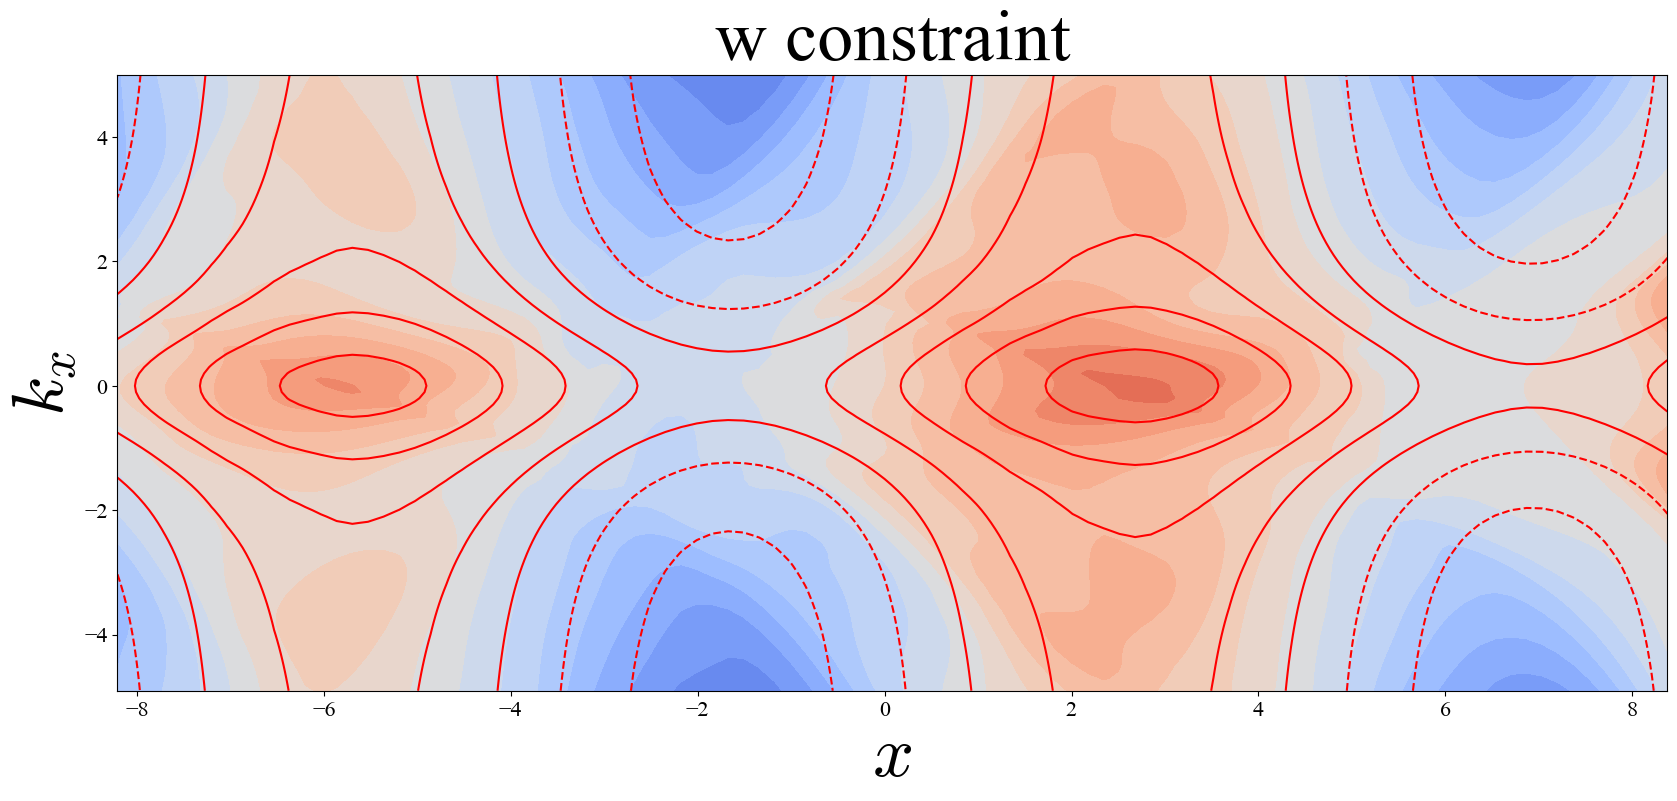

(10000,) (10000,)
cos sim = [[0.56130629]]
168


/var/folders/ts/qjqfp9s96ls7tl_x15xhlf0r0000gn/T/ipykernel_17116/1459985591.py:43: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(X,Y,H[time-1], colors="red",label="True")


<Figure size 2000x800 with 0 Axes>

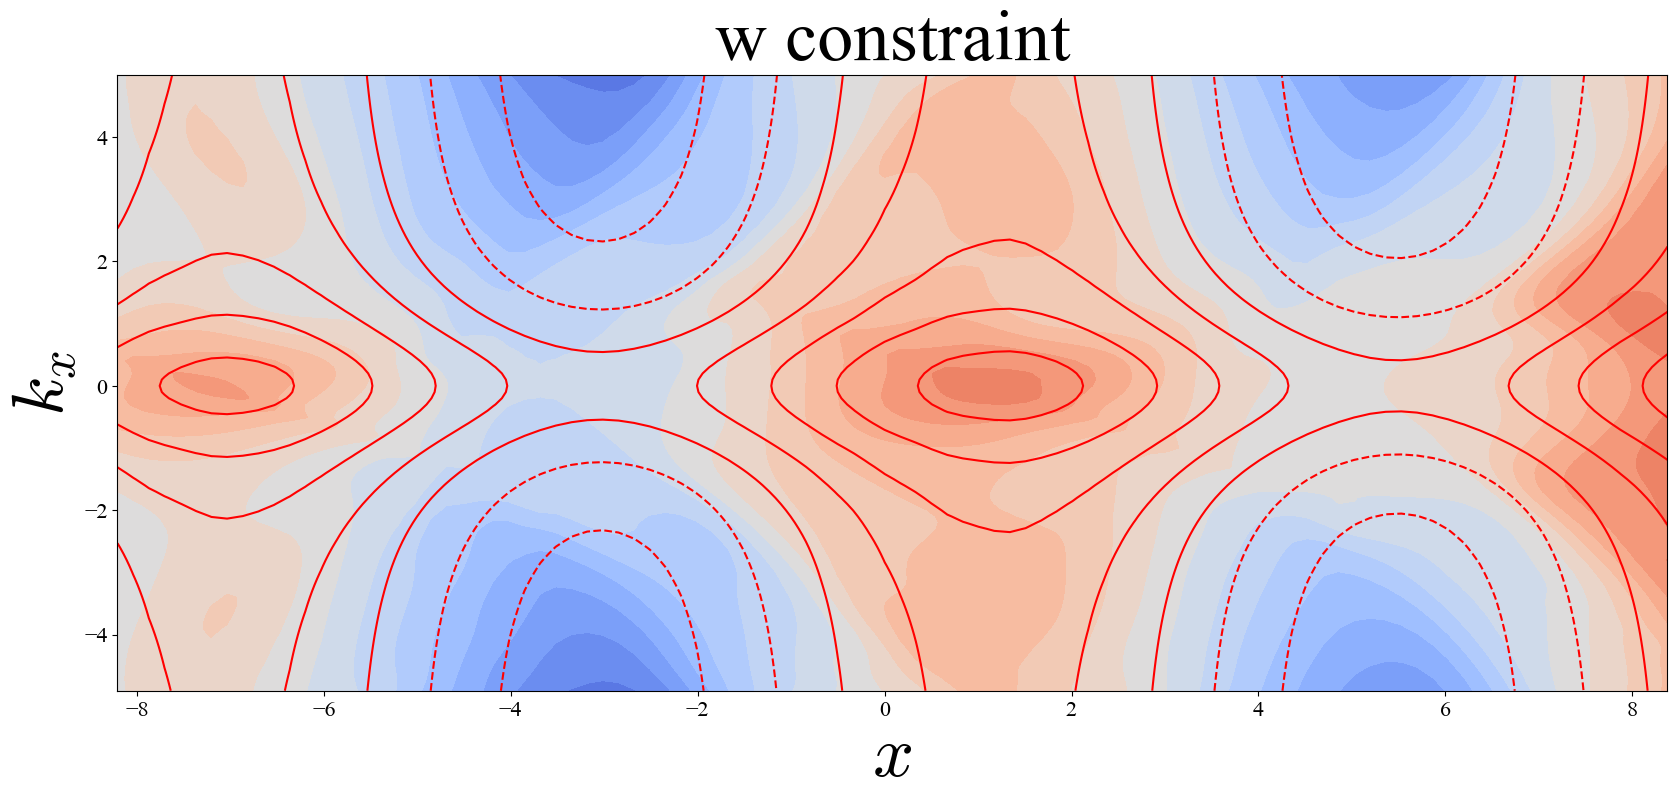

(10000,) (10000,)
cos sim = [[0.8206655]]
169


/var/folders/ts/qjqfp9s96ls7tl_x15xhlf0r0000gn/T/ipykernel_17116/1459985591.py:43: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(X,Y,H[time-1], colors="red",label="True")


<Figure size 2000x800 with 0 Axes>

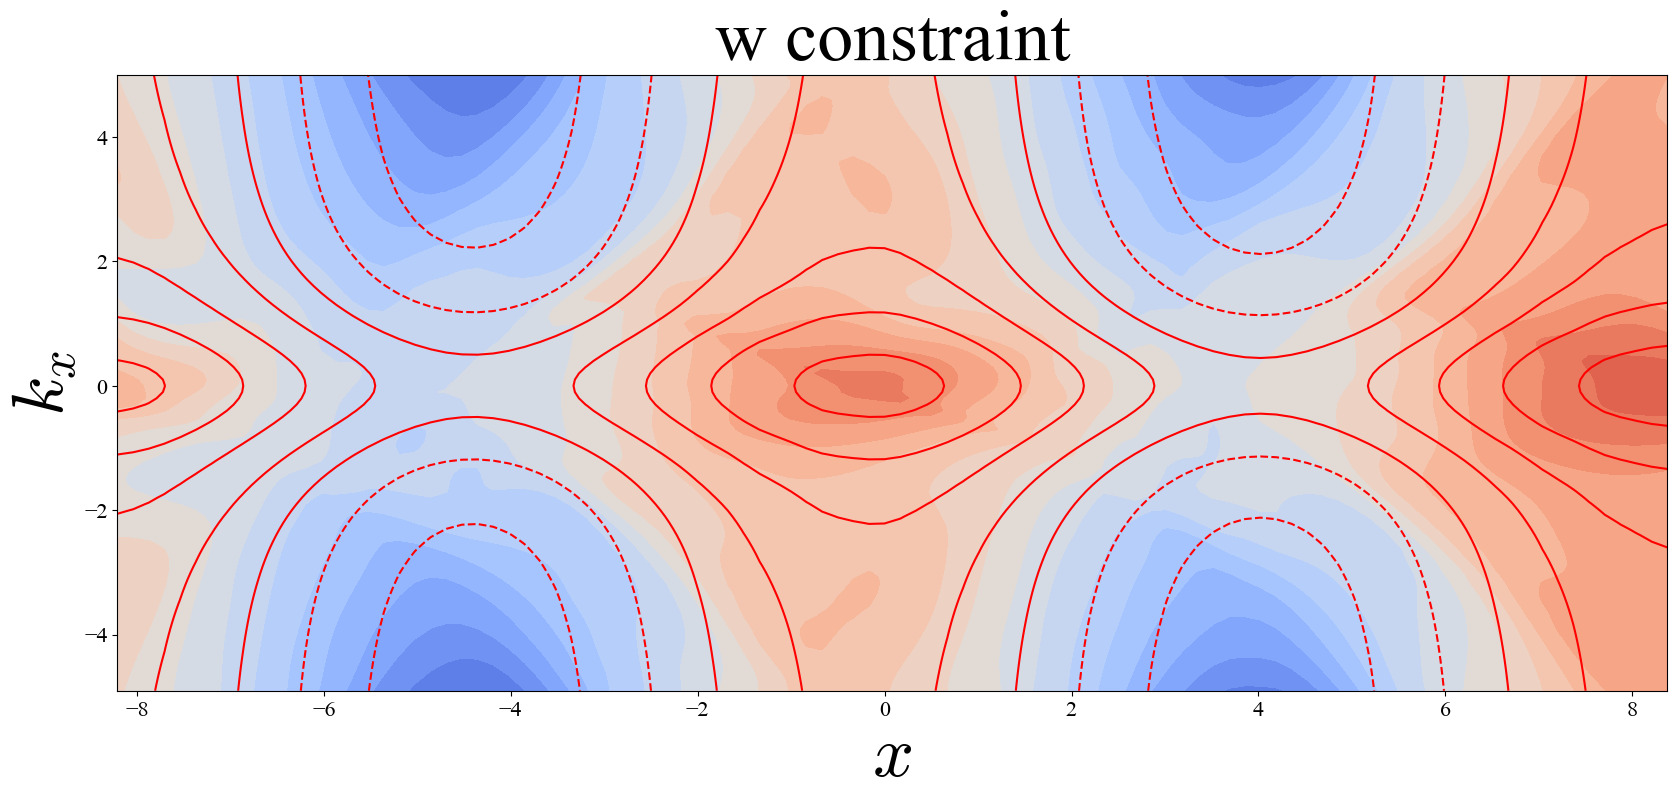

(10000,) (10000,)
cos sim = [[0.79459214]]
170


/var/folders/ts/qjqfp9s96ls7tl_x15xhlf0r0000gn/T/ipykernel_17116/1459985591.py:43: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(X,Y,H[time-1], colors="red",label="True")


<Figure size 2000x800 with 0 Axes>

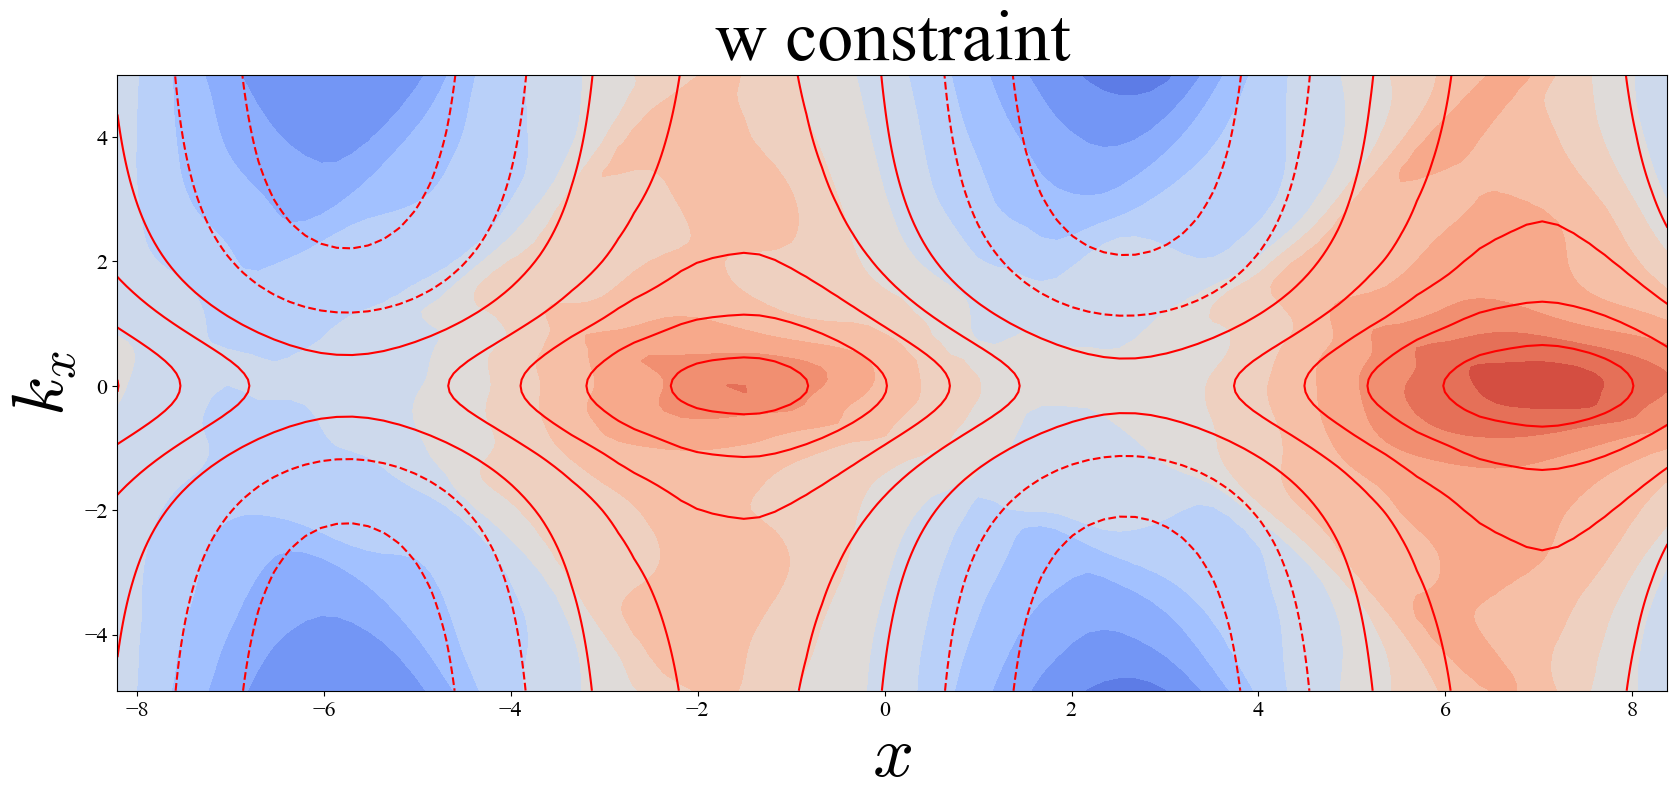

(10000,) (10000,)
cos sim = [[0.49525711]]
171


/var/folders/ts/qjqfp9s96ls7tl_x15xhlf0r0000gn/T/ipykernel_17116/1459985591.py:43: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(X,Y,H[time-1], colors="red",label="True")


<Figure size 2000x800 with 0 Axes>

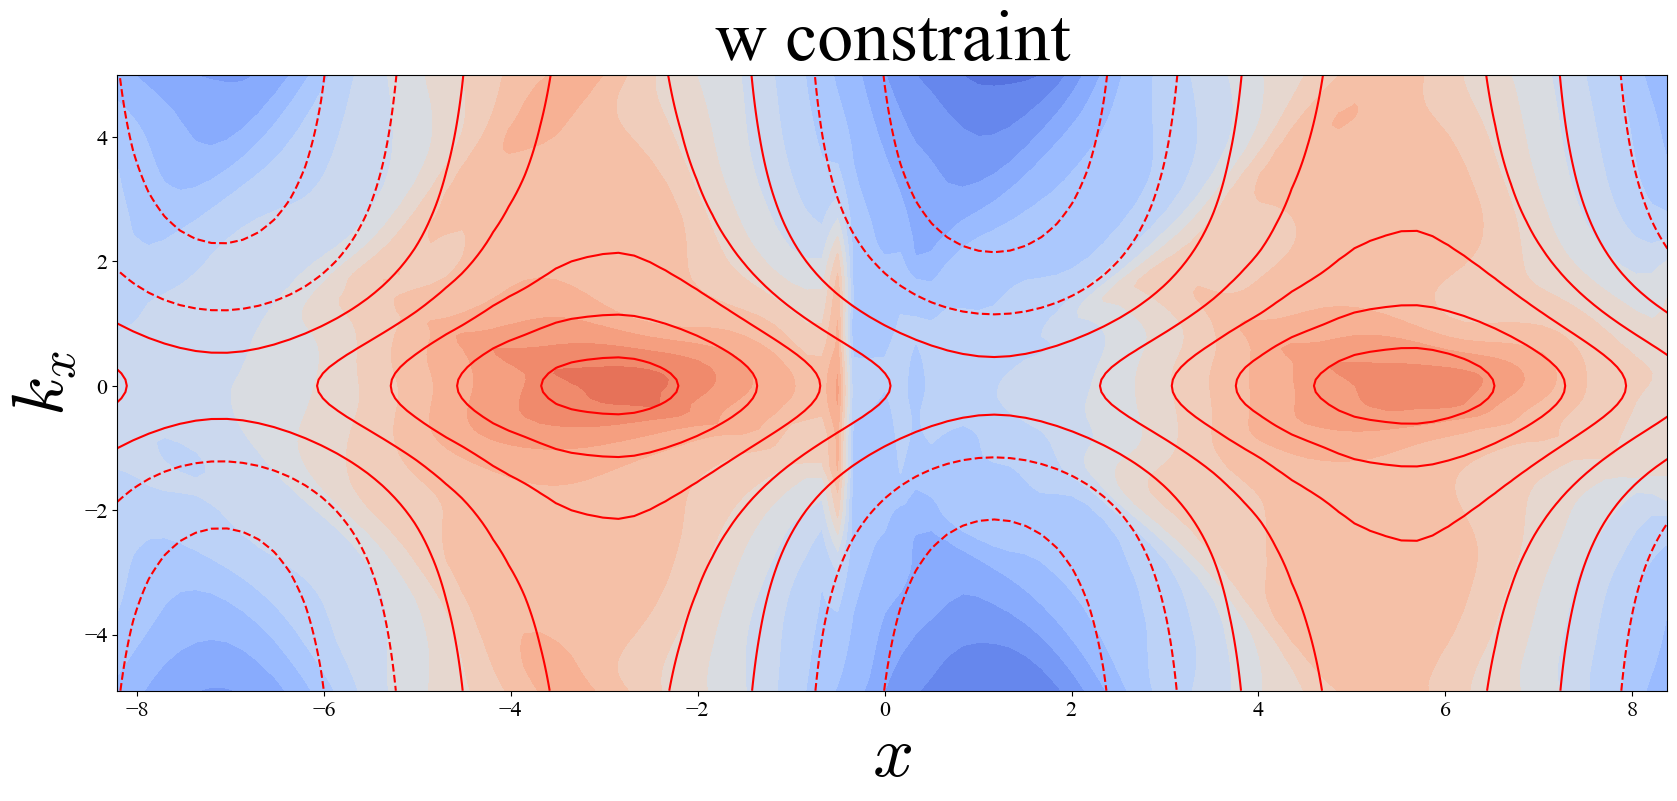

(10000,) (10000,)
cos sim = [[0.68883998]]
172


/var/folders/ts/qjqfp9s96ls7tl_x15xhlf0r0000gn/T/ipykernel_17116/1459985591.py:43: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(X,Y,H[time-1], colors="red",label="True")


<Figure size 2000x800 with 0 Axes>

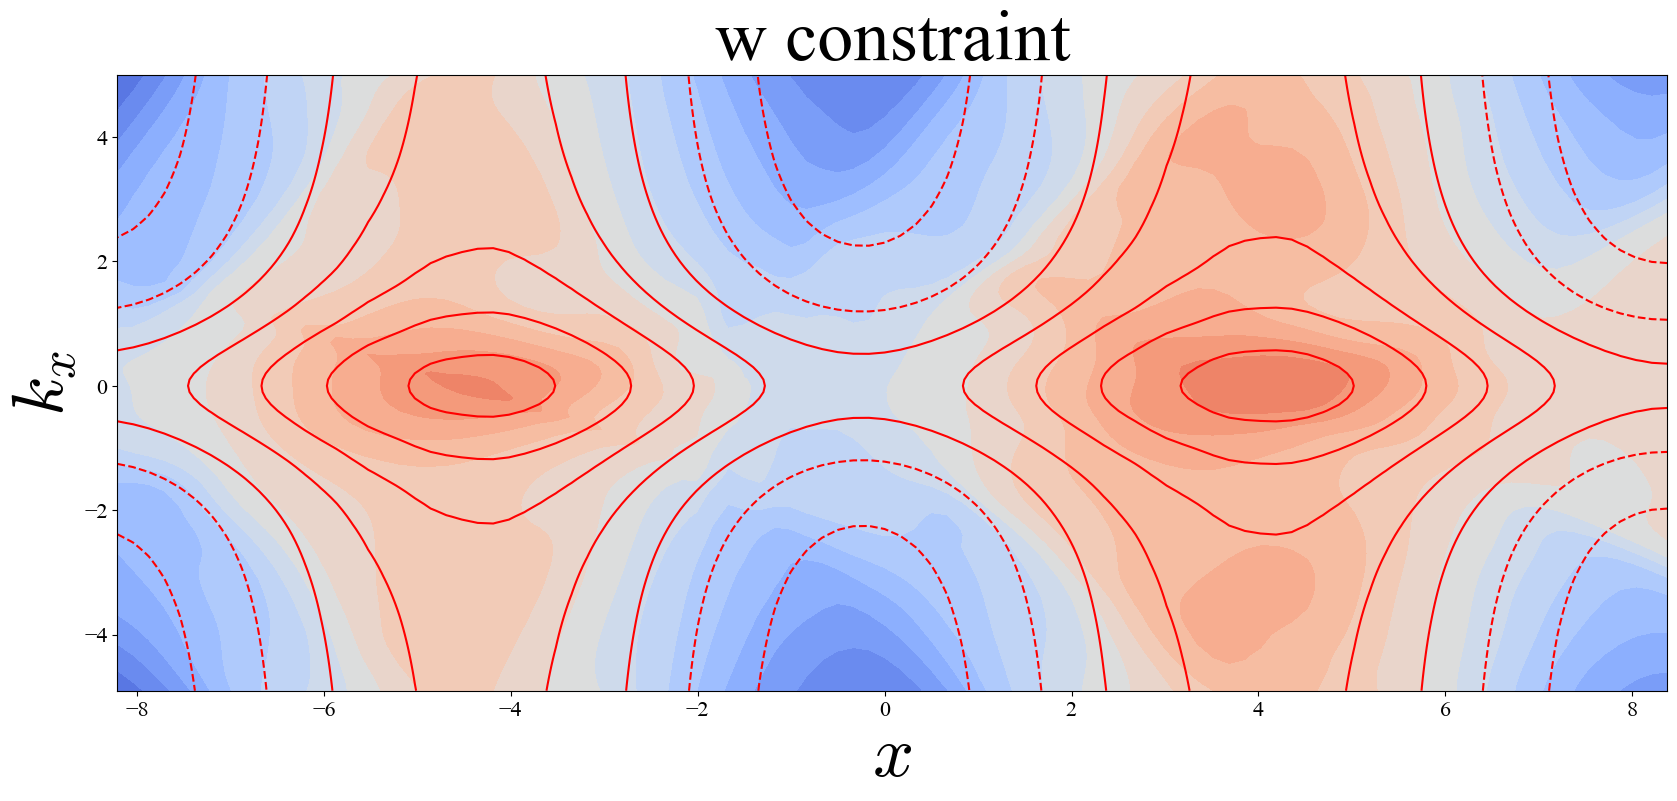

(10000,) (10000,)
cos sim = [[0.57422107]]
173


/var/folders/ts/qjqfp9s96ls7tl_x15xhlf0r0000gn/T/ipykernel_17116/1459985591.py:43: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(X,Y,H[time-1], colors="red",label="True")


<Figure size 2000x800 with 0 Axes>

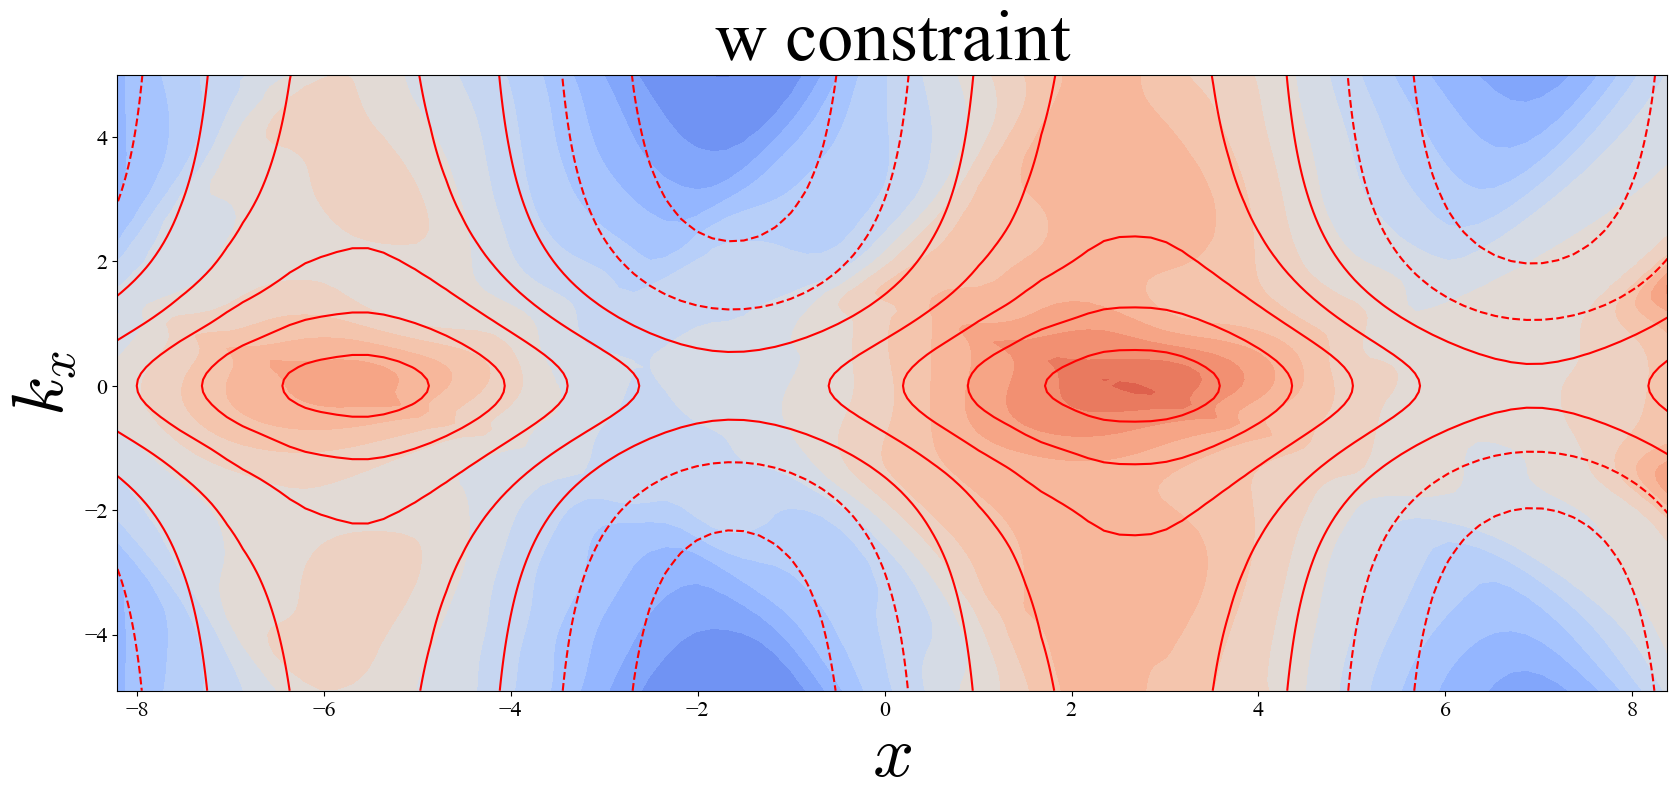

(10000,) (10000,)
cos sim = [[0.8180584]]
174


/var/folders/ts/qjqfp9s96ls7tl_x15xhlf0r0000gn/T/ipykernel_17116/1459985591.py:43: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(X,Y,H[time-1], colors="red",label="True")


<Figure size 2000x800 with 0 Axes>

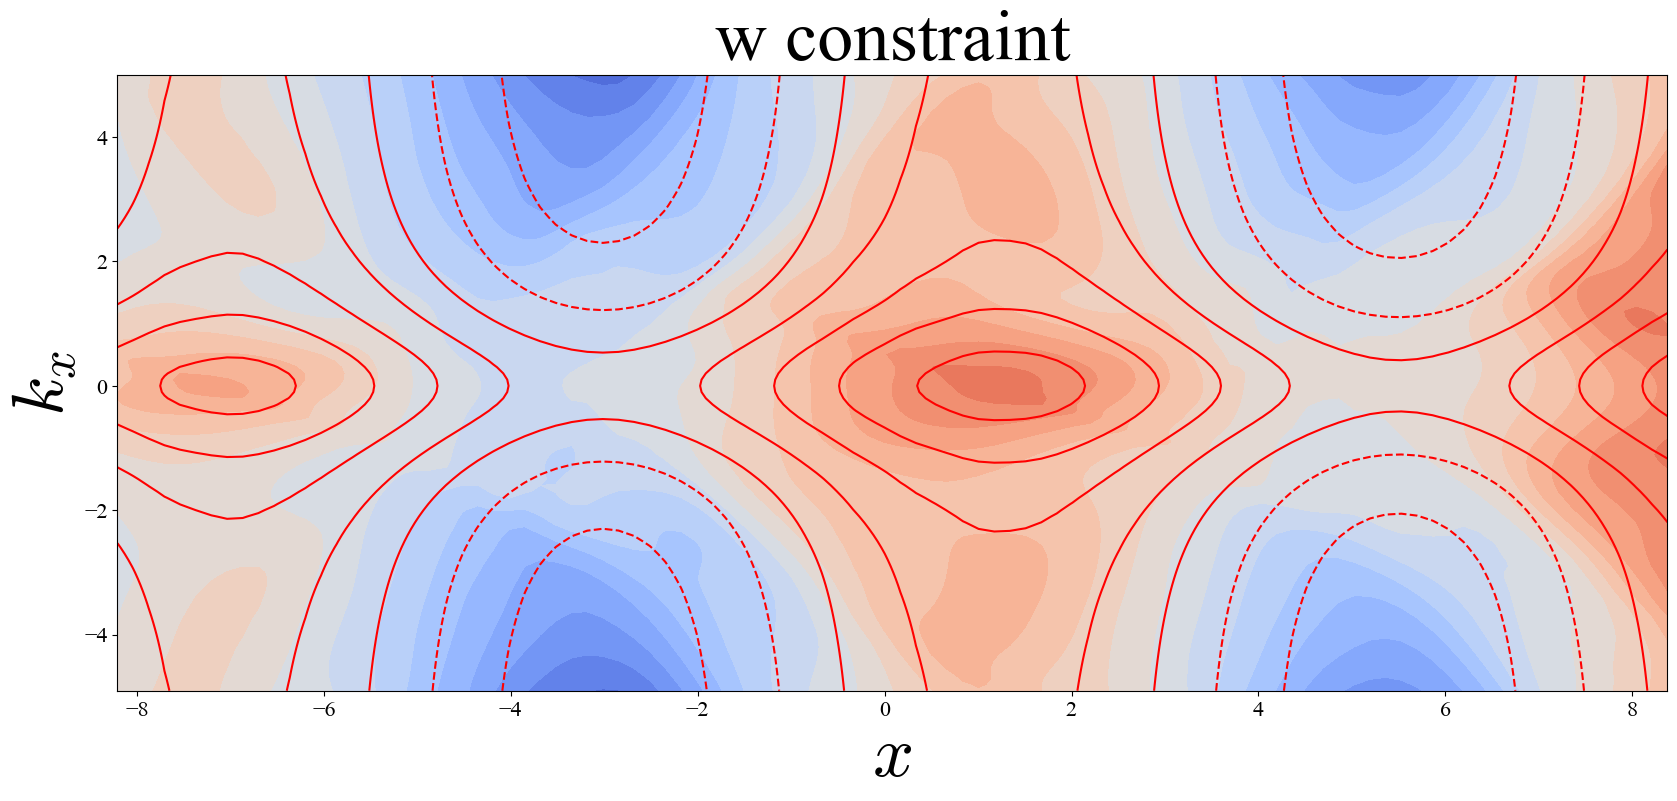

(10000,) (10000,)
cos sim = [[-0.08465702]]
175


/var/folders/ts/qjqfp9s96ls7tl_x15xhlf0r0000gn/T/ipykernel_17116/1459985591.py:43: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(X,Y,H[time-1], colors="red",label="True")


<Figure size 2000x800 with 0 Axes>

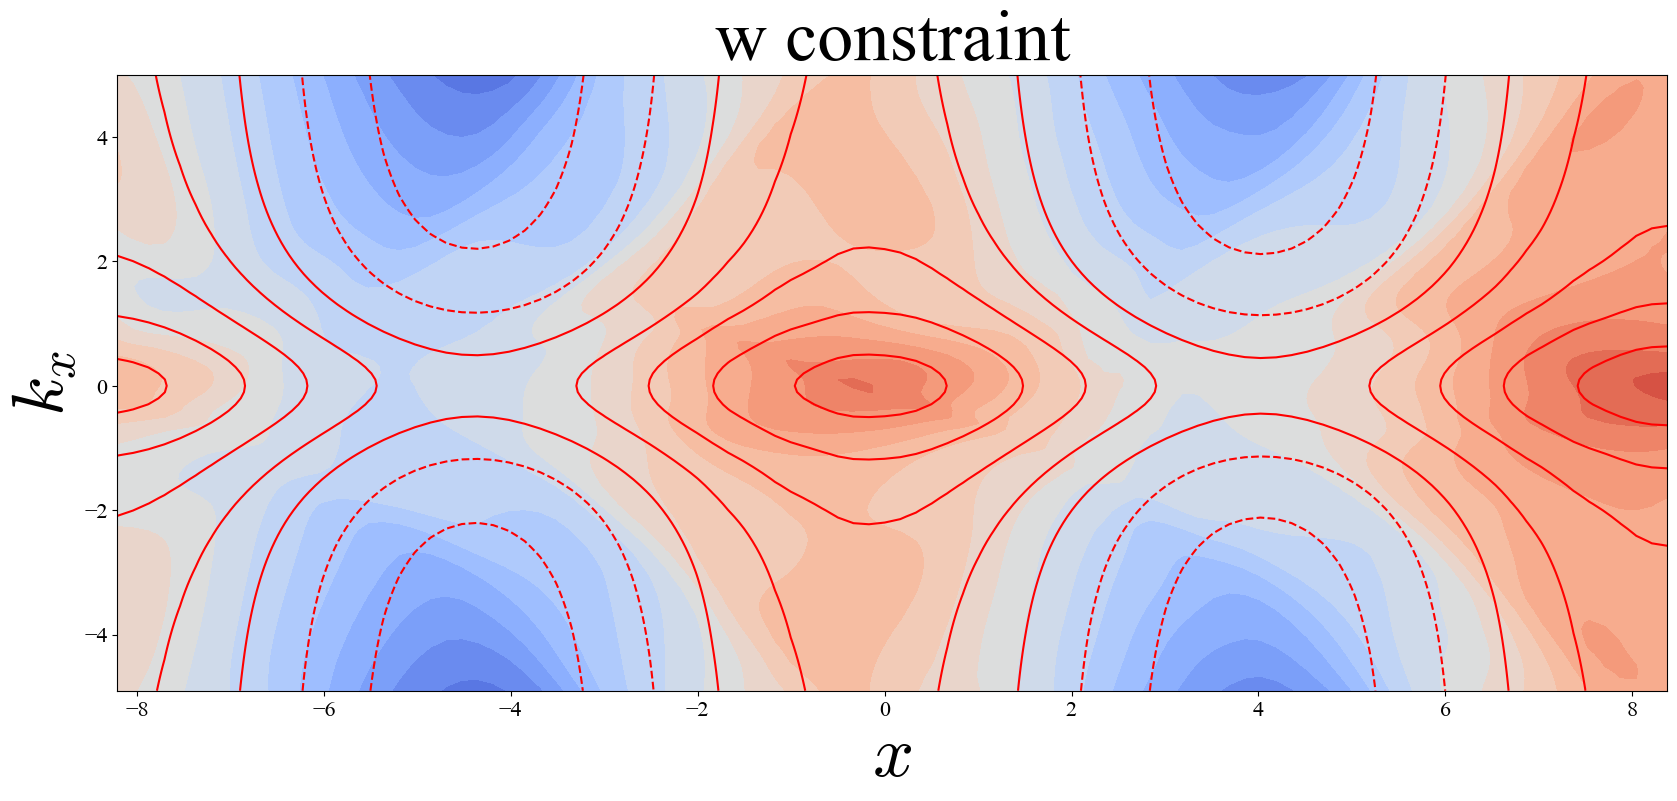

(10000,) (10000,)
cos sim = [[0.70659005]]
176


/var/folders/ts/qjqfp9s96ls7tl_x15xhlf0r0000gn/T/ipykernel_17116/1459985591.py:43: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(X,Y,H[time-1], colors="red",label="True")


<Figure size 2000x800 with 0 Axes>

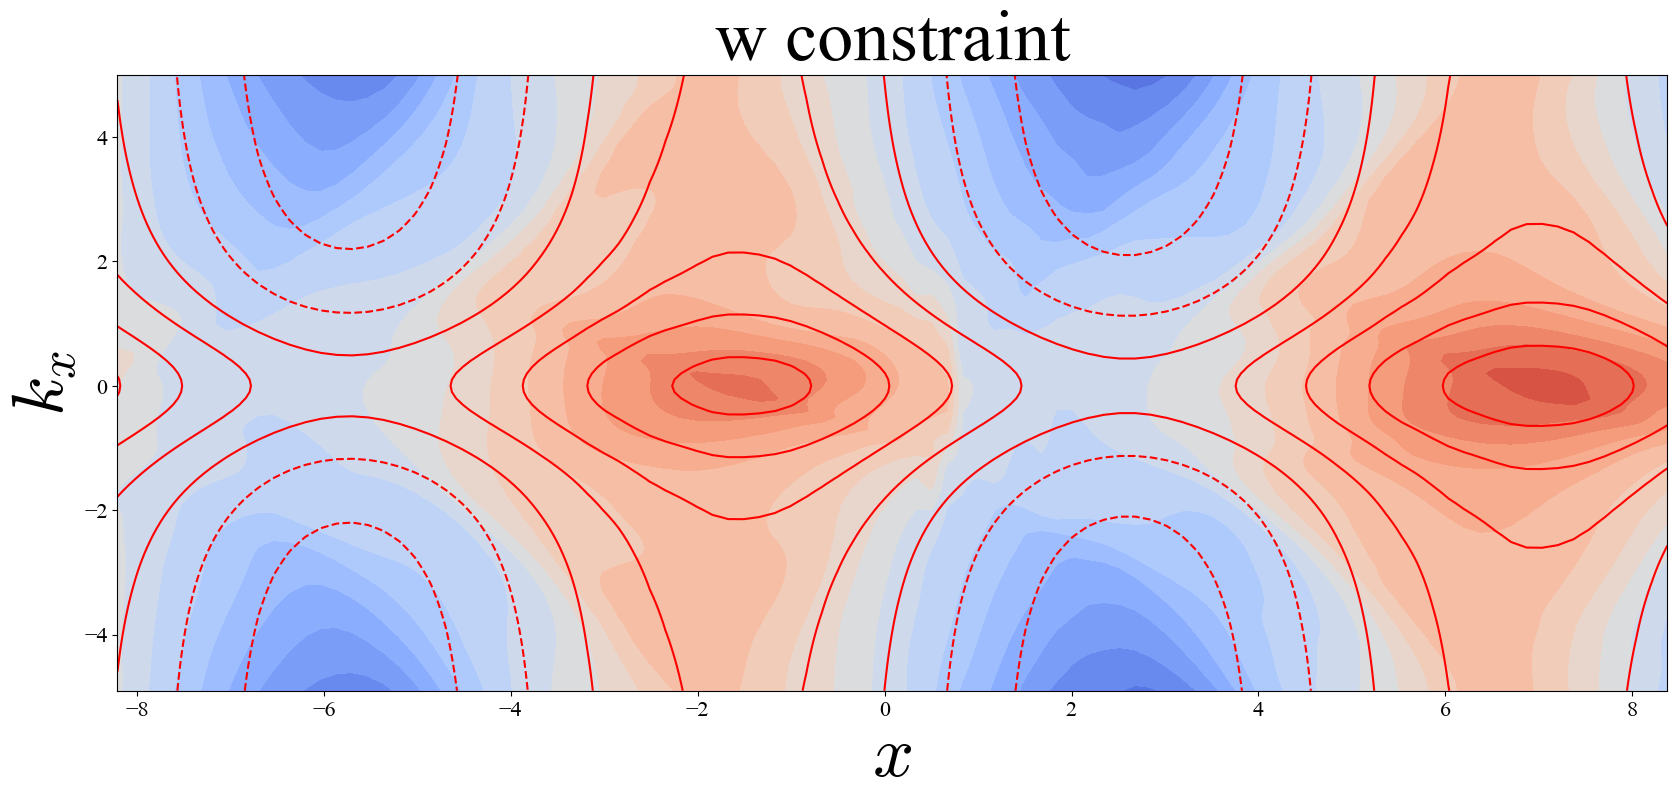

(10000,) (10000,)
cos sim = [[0.89368749]]
177


/var/folders/ts/qjqfp9s96ls7tl_x15xhlf0r0000gn/T/ipykernel_17116/1459985591.py:43: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(X,Y,H[time-1], colors="red",label="True")


<Figure size 2000x800 with 0 Axes>

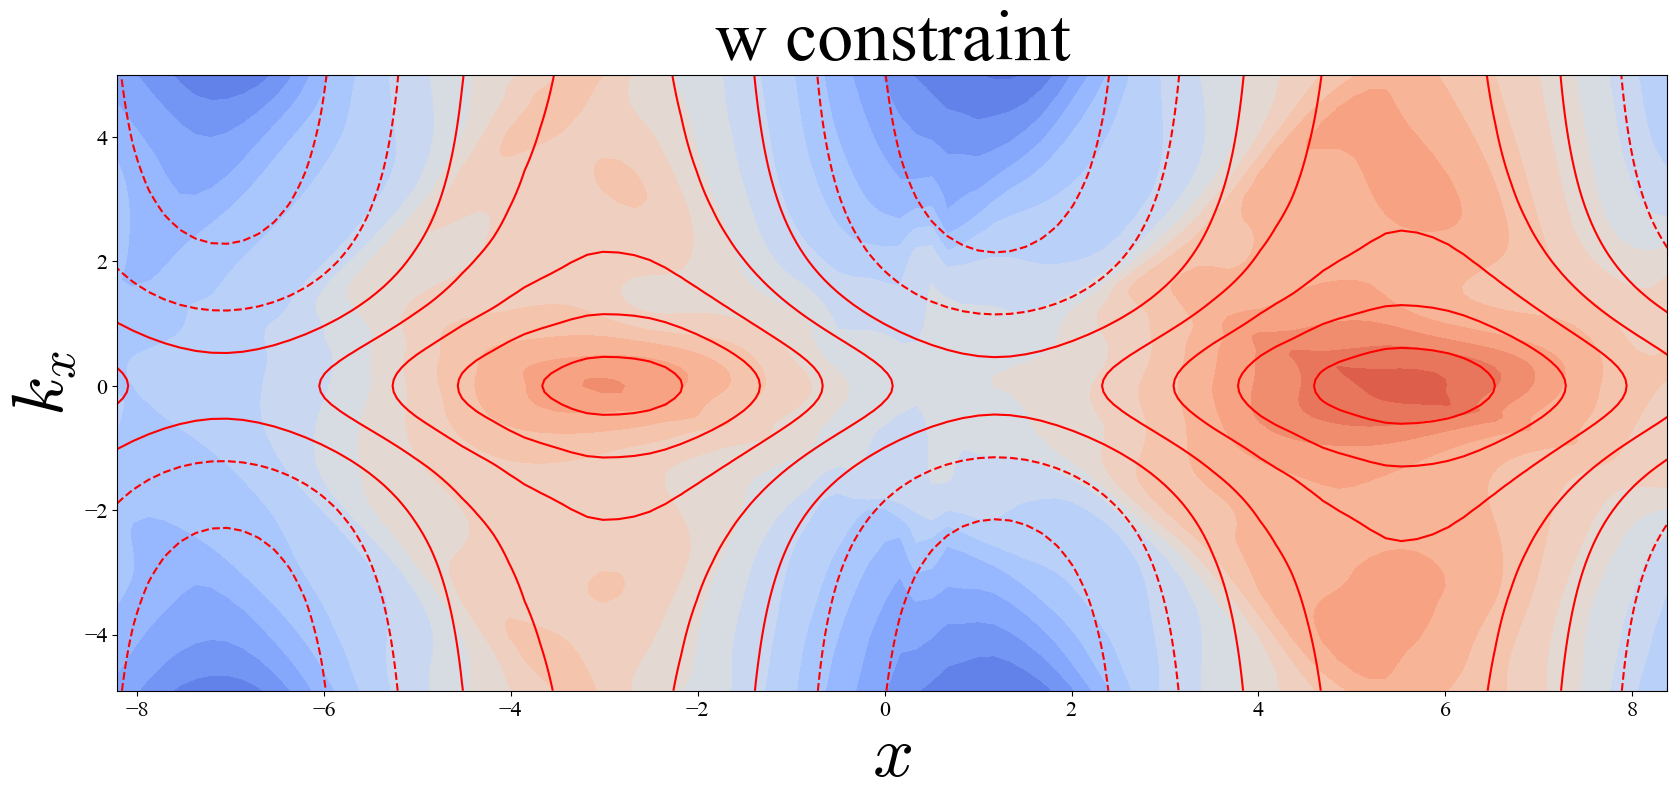

(10000,) (10000,)
cos sim = [[0.47598937]]
178


/var/folders/ts/qjqfp9s96ls7tl_x15xhlf0r0000gn/T/ipykernel_17116/1459985591.py:43: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(X,Y,H[time-1], colors="red",label="True")


<Figure size 2000x800 with 0 Axes>

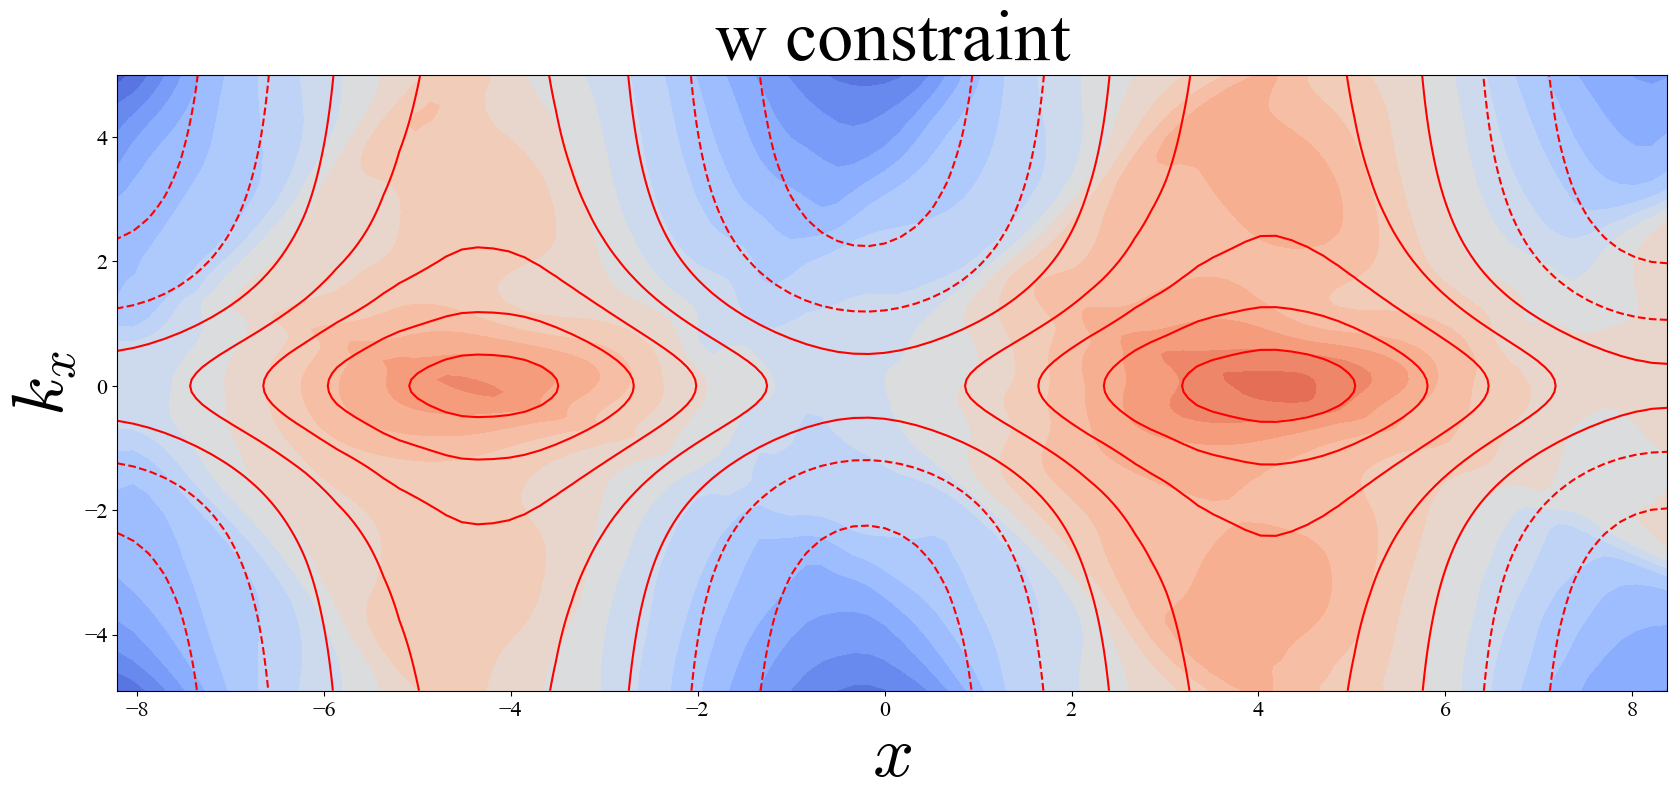

(10000,) (10000,)
cos sim = [[0.60952871]]
179


/var/folders/ts/qjqfp9s96ls7tl_x15xhlf0r0000gn/T/ipykernel_17116/1459985591.py:43: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(X,Y,H[time-1], colors="red",label="True")


<Figure size 2000x800 with 0 Axes>

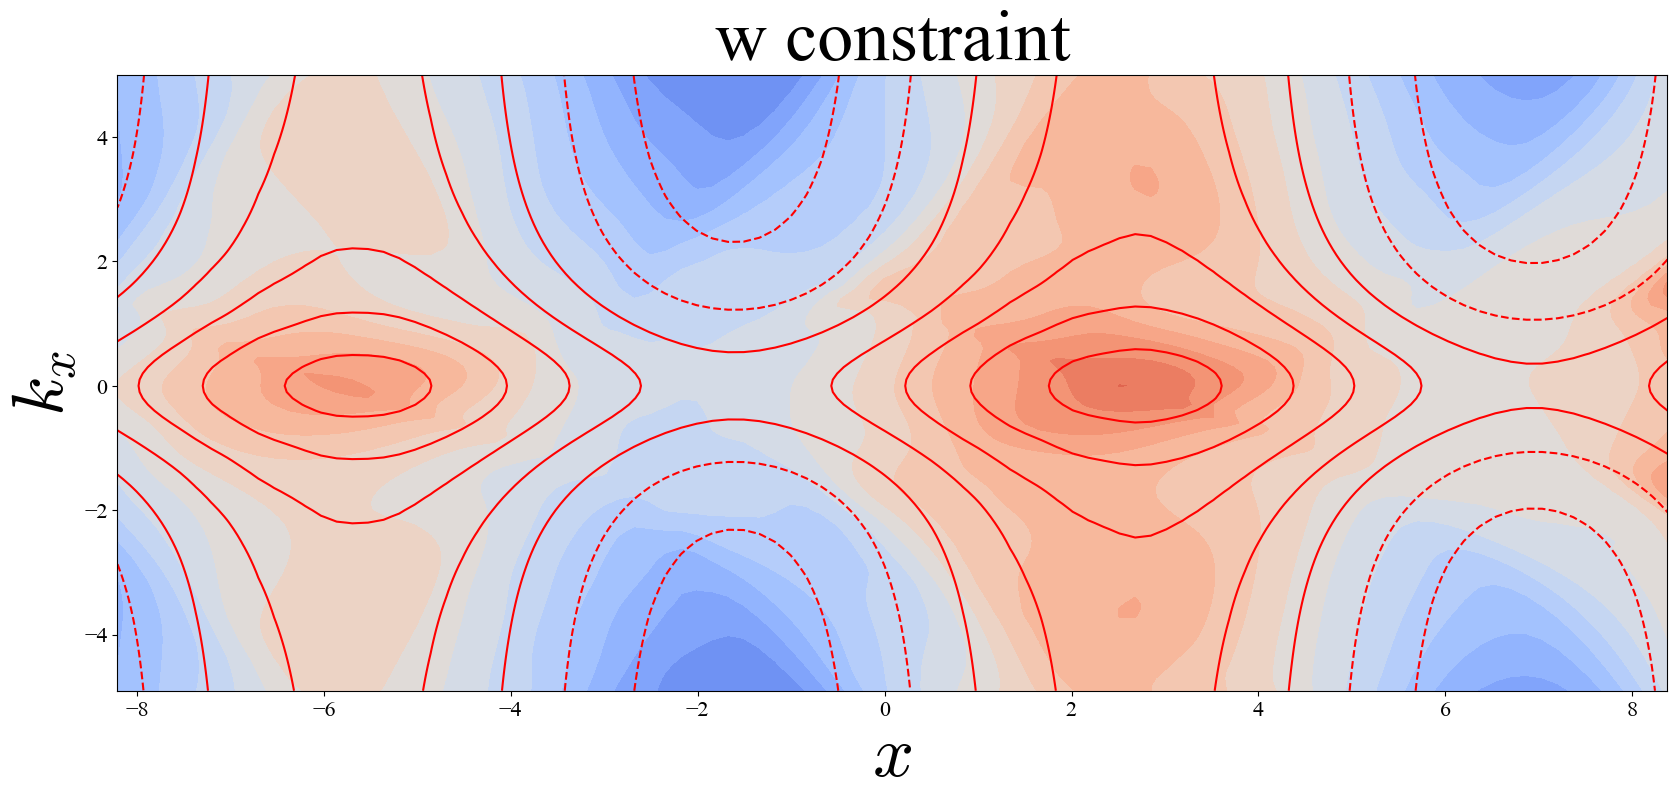

(10000,) (10000,)
cos sim = [[-0.09316429]]


In [24]:
for time in range(150,180):
    time_index = time
    
    args = ObjectView(get_args())
    
    hnn_model = get_model(args, baseline=False)

    data = np.load("../TrainNN/traindata/TrainHNN_GZ_26_origin_1.npy")
    data = data[:,150:250,100:200]
    data = data.reshape([401,100*100,7])
    
    x_all = torch.tensor(data, requires_grad=True, dtype=torch.float32)
    x = np.array([data[time,:,1],data[time,:,2]]).T
    x = torch.from_numpy(x.astype(np.float32)).clone()
    y = hnn_model.forward(x)
    y = y[0].to('cpu').detach().numpy().copy()

    data = np.load("../TrainNN/traindata/TrainHNN_GZ_26_origin_1.npy")
    data = data[:,150:250,100:200]
    data = data.reshape([401,100*100,7])
    plot_data = np.load("../TrainNN/traindata/TrainHNN_GZ_26_origin_1.npy")
    plot_data = plot_data[:,150:250,100:200]
    
    for time in [time_index]:#,-2,-3,-4,-5,-6,-7,-8,-9,-10]:

        plt.figure(figsize=[20,8])
        plt.rcParams["font.size"] = 16
        plt.rc('mathtext', **{'rm': 'serif',
                              'it': 'serif:itelic',
                              'bf': 'serif:bold',
                              'fontset': 'cm'})
        plt.rcParams["font.family"] = "Times New Roman" 
        
        X, Y = np.meshgrid(plot_data[time,0,:,1], plot_data[time,:,0,2])
        x = np.array([data[time,:,1],data[time,:,2]]).T
        x = torch.from_numpy(x.astype(np.float32)).clone()
        y = hnn_model.forward(x)
        y = y[1].to('cpu').detach().numpy().copy()
        
        
        plt.figure(figsize=[20,8])
        plt.contourf(X,Y,y.reshape([100,100]),cmap="coolwarm",levels=15,vmin=np.mean(y)-0.6,vmax=np.mean(y)+0.6)
        plt.contour(X,Y,H[time-1], colors="red",label="True")
        plt.xlabel("$x$",fontsize=52)
        plt.ylabel("$k_x$",fontsize=52)
        plt.title("w constraint",fontsize=52)
        plt.show()
        print(y.flatten().shape,H[time-1].flatten().shape)
        print("cos sim = "+str(cosine_similarity(y.flatten().reshape([10000,1]).T,H[time-1].flatten().reshape([10000,1]).T)))